In [ ]:
!pip install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-f92qacm4
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-f92qacm4
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done
  Created wheel for pyFTS: filename=pyFTS-1.7-py3-none-any.whl size=219432 sha256=68de56d0cf5510f1776e275f67eb41d147e2ce2aa174c0222e325d1a74f065af
  Stored in directory: /tmp/pip-ephem-wheel-cache-eemiomip/wheels/7f/25/75/dd8f713bf48592da71e0441c7abdc1f5aa4d9645a6b7ee99d4
Successfully built pyFTS


In [ ]:
!pip install SciencePlots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
import seaborn as sns
import scienceplots


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
plt.rcParams.update({'font.size': 28,
                     'xtick.labelsize': 28,
                     'ytick.labelsize': 28,
                     'legend.fontsize': 28,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'lines.linewidth': 4.0,
                     'figure.dpi': 300})

In [ ]:
plt.style.use(['science', 'notebook', 'grid'])

In [ ]:
from pyFTS.models import song, chen, yu

In [ ]:
import yfinance as yf

In [ ]:
symbol = "BTC-USD"
data = yf.download(f'{symbol}', start='2016-01-01', end='2022-09-15')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

Open          High           Low         Close  \
Date                                                                 
2016-01-01    430.721008    436.246002    427.515015    434.334015   
2016-01-02    434.622009    436.062012    431.869995    433.437988   
2016-01-03    433.578003    433.743011    424.705994    430.010986   
2016-01-04    430.061005    434.516998    429.084015    433.091003   
2016-01-05    433.069000    434.182007    429.675995    431.959991   
...                  ...           ...           ...           ...   
2022-09-10  21376.912109  21760.275391  21168.722656  21680.539062   
2022-09-11  21678.542969  21770.552734  21406.945312  21769.255859   
2022-09-12  21770.148438  22439.181641  21603.896484  22370.449219   
2022-09-13  22371.480469  22673.820312  20062.669922  20296.707031   
2022-09-14  20184.554688  20467.201172  19793.396484  20241.089844   

               Adj Close       Volume  
Date                                   
2016-01-01    434.334015     36278900  
2016-01-02    433.437988     30096600  
2016-01-03    430.010986     39633800  
2016-01-04    433.091003     38477500  
2016-01-05    431.959991     34522600  
...                  ...          ...  
2022-09-10  21680.539062  36913738894  
2022-09-11  21769.255859  34493951963  
2022-09-12  22370.449219  50212088965  
2022-09-13  20296.707031  51091116622  
2022-09-14  20241.089844  37872380889  

[2449 rows x 6 columns]

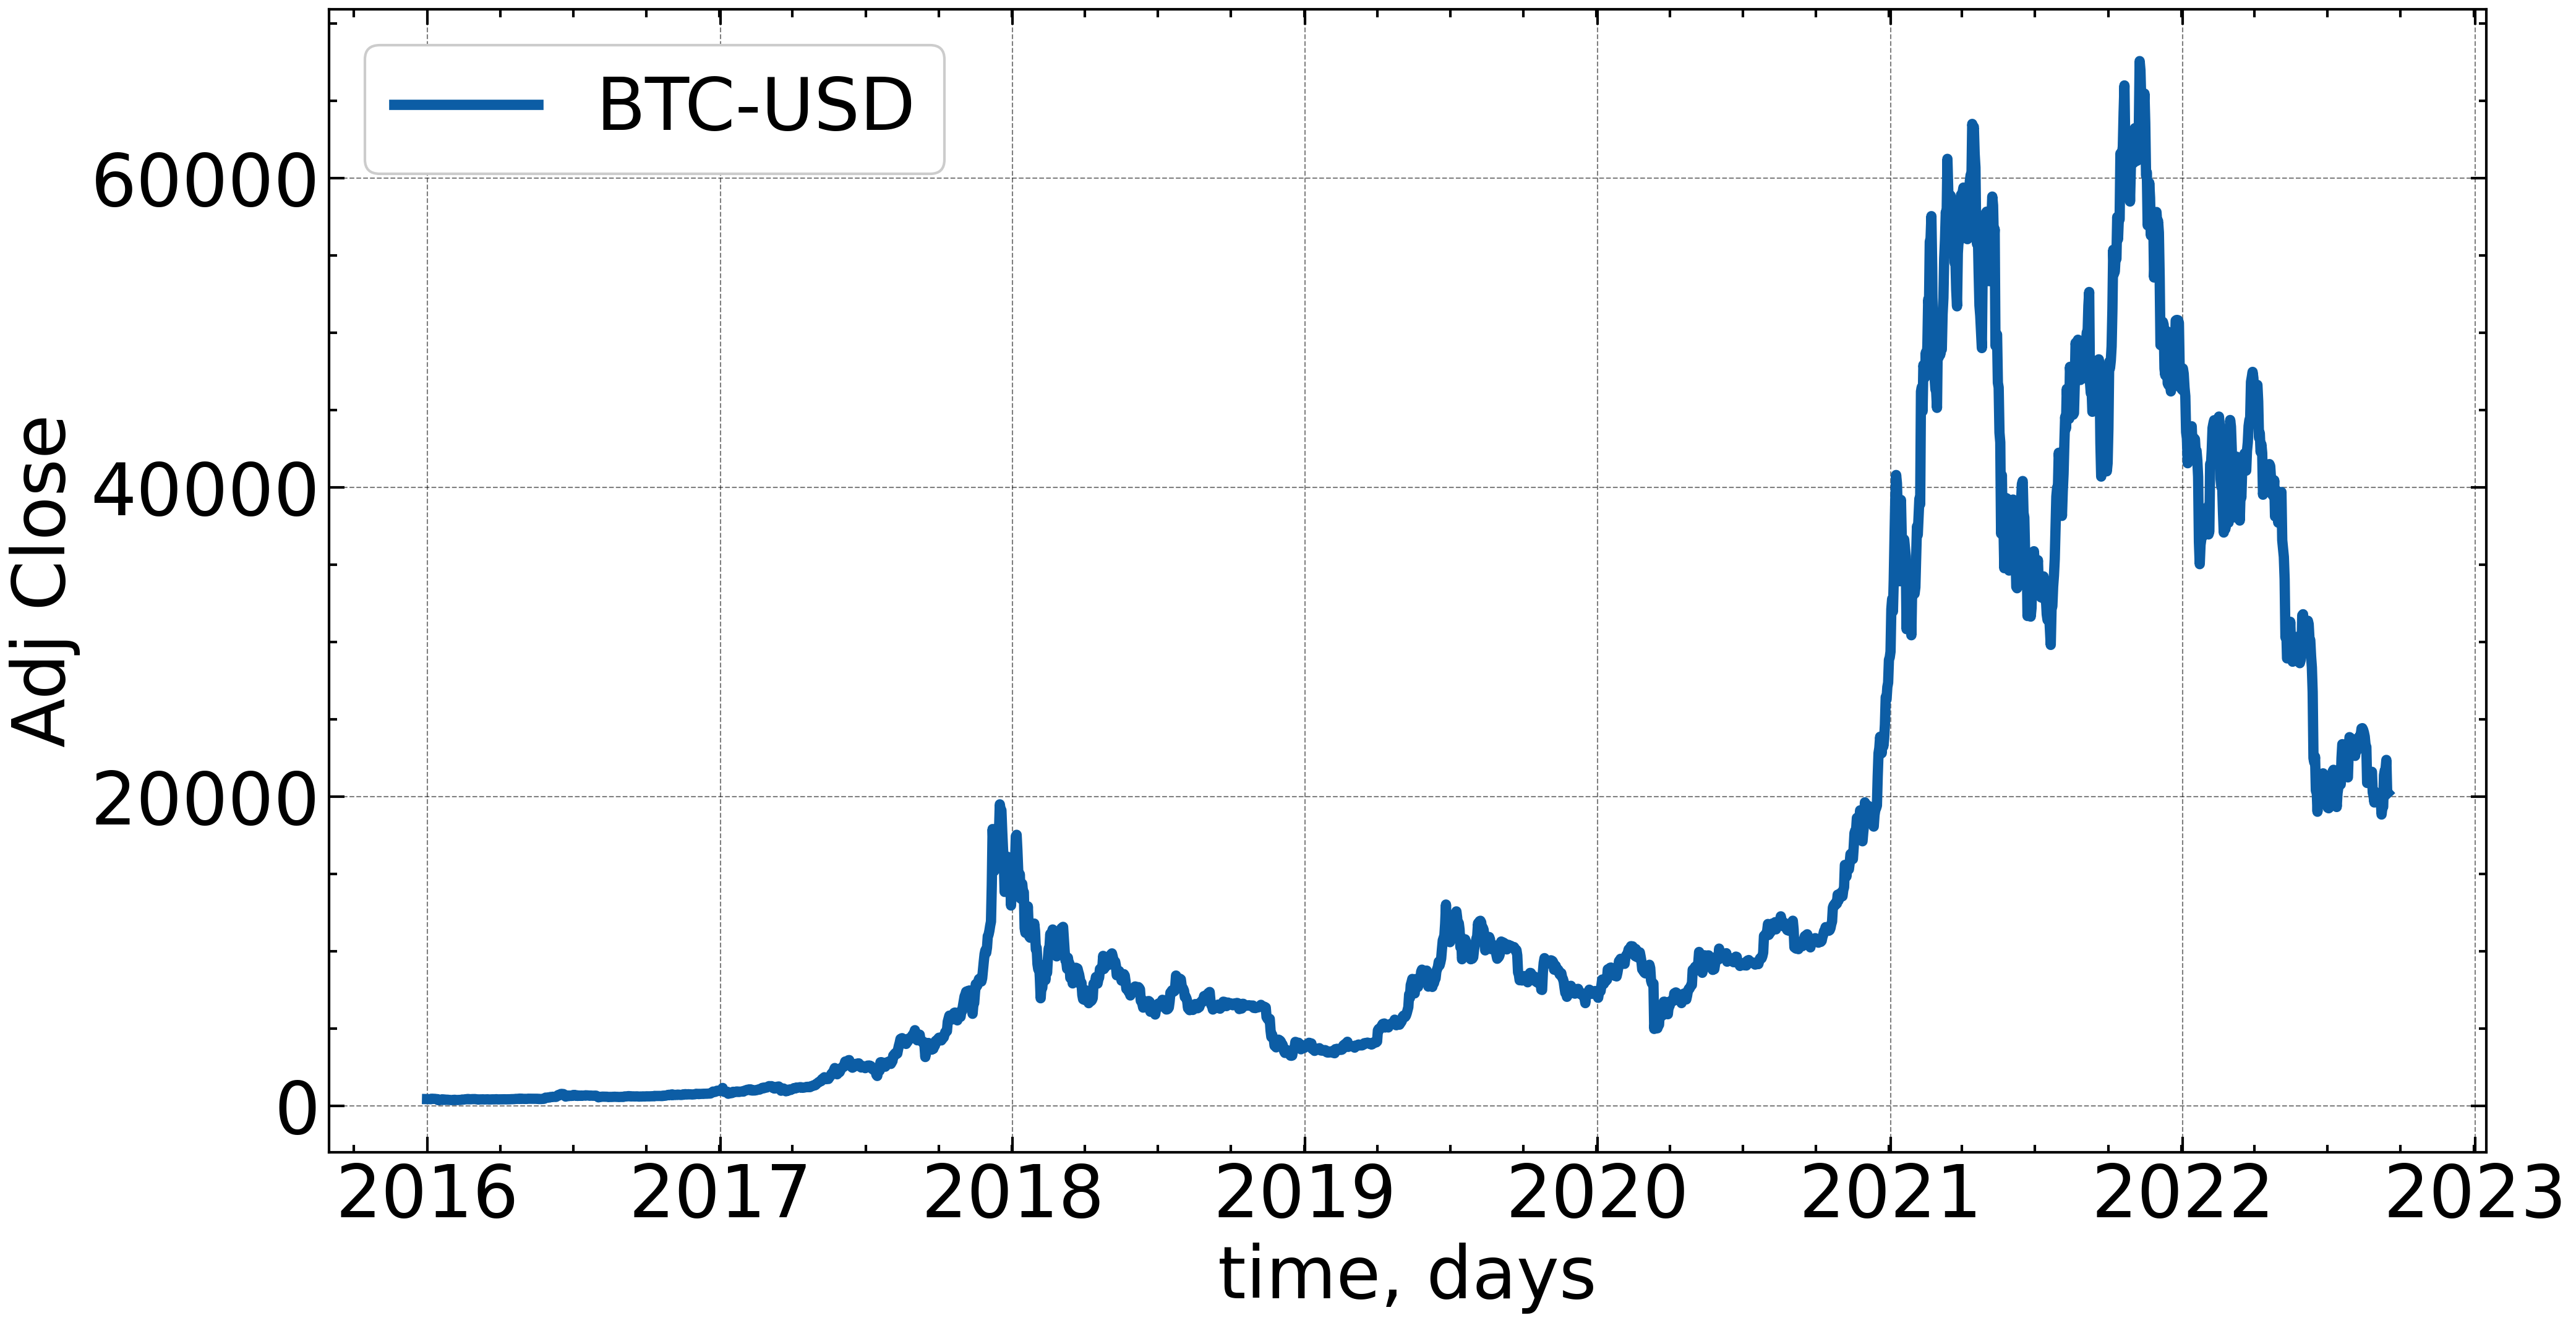

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(data.index, data['Adj Close'], label=symbol)

ax.set_xlabel('time, days')
ax.set_ylabel('Adj Close')

ax.legend()

plt.savefig(f"{symbol} graph.jpg")
plt.show()

In [ ]:
from pyFTS.common import Transformations

norm = Transformations.ROI()
#norm = Transformations.Differential(1)

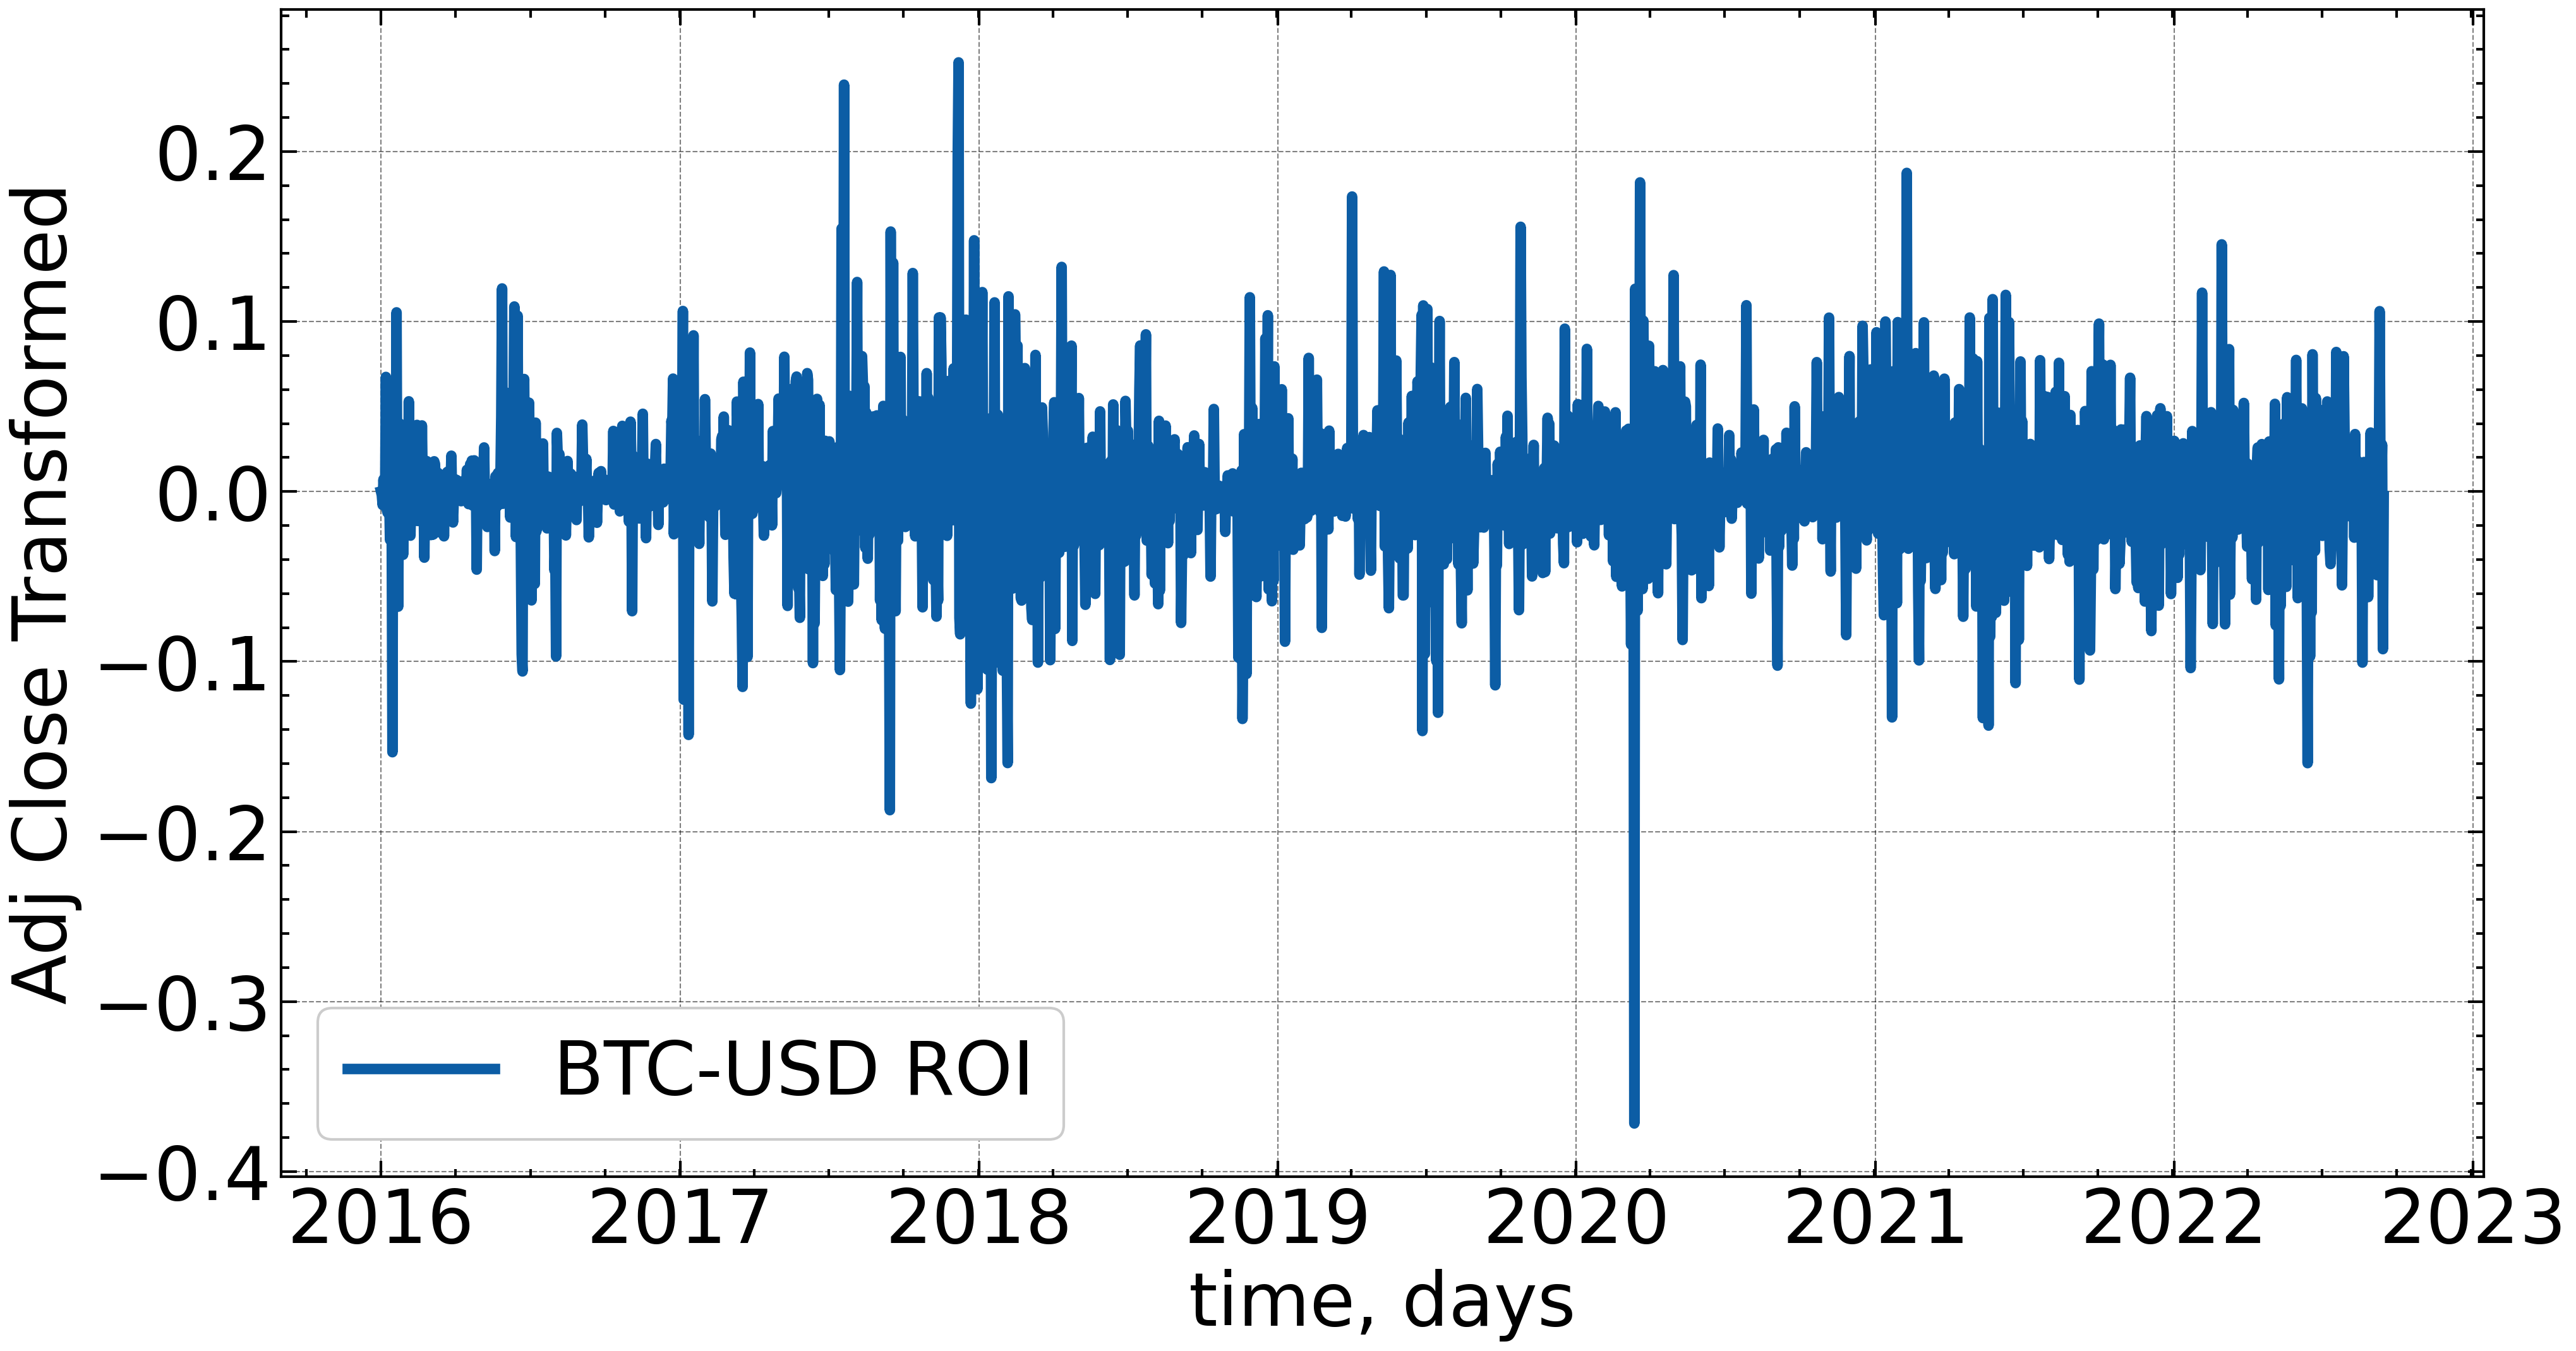

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(data.index, norm.apply(data['Adj Close'].values), label=f'{symbol} ROI')

ax.set_xlabel('time, days')
ax.set_ylabel('Adj Close Transformed')

ax.legend()

plt.savefig(f"{symbol} graph roi.jpg")
plt.show()

In [ ]:
from pyFTS.partitioners import Grid, Entropy

In [ ]:
close_data = data['Adj Close']

train_size = 0.8  # Percentage of data to use for training
split_index = int(len(close_data) * train_size)

data_train = close_data[:split_index].values
data_test = close_data[split_index:].values

In [ ]:
from pyFTS.common import Membership as mf
fs = Grid.GridPartitioner(data=data_train, npart=15, func=mf.gaussmf, transformation=norm)

print(fs)

Grid:
A0: gaussmf([-0.4088649241612879, 0.016347233044410426])
A1: gaussmf([-0.35982322502805664, 0.016347233044410426])
A2: gaussmf([-0.31078152589482533, 0.016347233044410426])
A3: gaussmf([-0.2617398267615941, 0.016347233044410426])
A4: gaussmf([-0.2126981276283628, 0.016347233044410426])
A5: gaussmf([-0.1636564284951315, 0.016347233044410426])
A6: gaussmf([-0.11461472936190026, 0.016347233044410426])
A7: gaussmf([-0.06557303022866895, 0.016347233044410426])
A8: gaussmf([-0.016531331095437696, 0.016347233044410426])
A9: gaussmf([0.03251036803779356, 0.016347233044410426])
A10: gaussmf([0.08155206717102487, 0.016347233044410426])
A11: gaussmf([0.13059376630425618, 0.016347233044410426])
A12: gaussmf([0.17963546543748737, 0.016347233044410426])
A13: gaussmf([0.22867716457071868, 0.016347233044410426])
A14: gaussmf([0.27771886370394994, 0.016347233044410426])



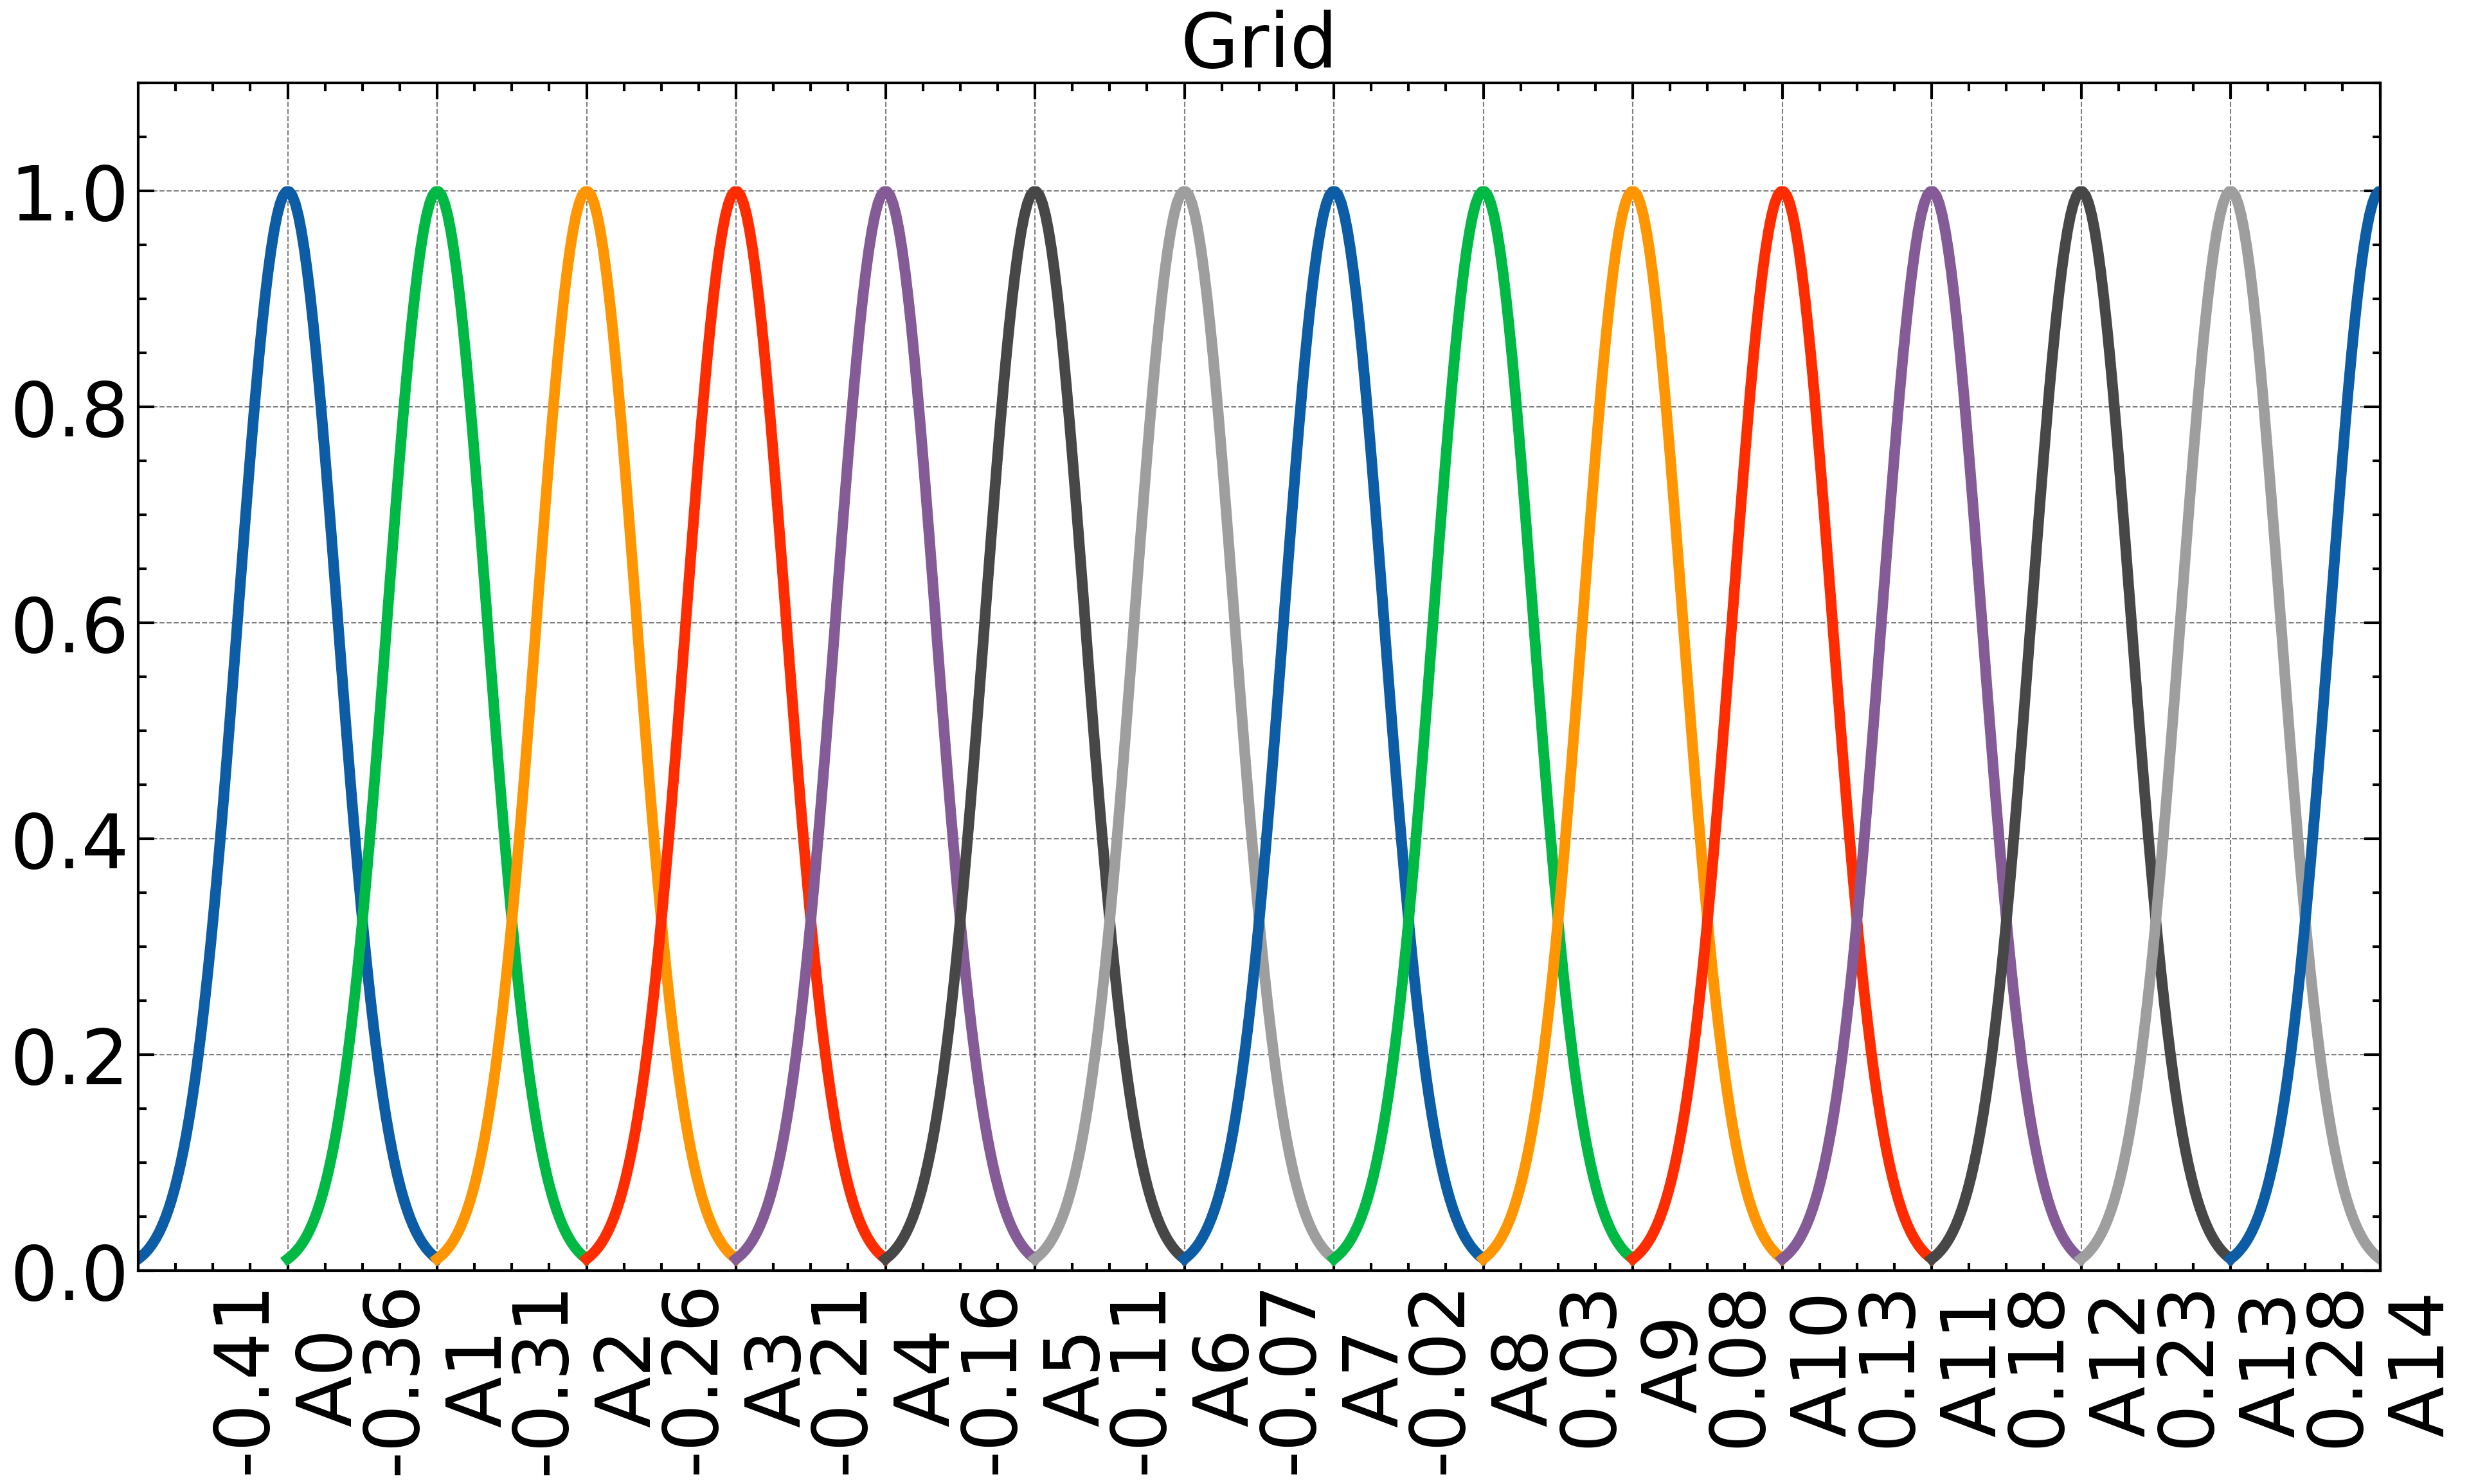

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,8])
plt.xticks(rotation = 90)
fs.plot(ax, rounding=2)

plt.savefig(f"{symbol} partitioning grid.jpg")
plt.show()

In [ ]:
model_song = song.ConventionalFTS(partitioner=fs)
model_song.append_transformation(norm)
model_song.fit(data_train, order=1)

In [ ]:
model_chen = chen.ConventionalFTS(partitioner=fs)
model_chen.append_transformation(norm)
model_chen.fit(data_train, order=1)

In [ ]:
model_yu = yu.WeightedFTS(partitioner=fs)
model_yu.append_transformation(norm)
model_yu.fit(data_train, order=1)

In [ ]:
print(model_song)

Traditional FTS:
[[8.37894253e-126 8.37894253e-126 8.37894253e-126 8.37894253e-126
  8.37894253e-126 8.37894253e-126 8.37894253e-126 8.37894253e-126
  8.37894253e-126 8.37894253e-126 8.37894253e-126 8.37894253e-126
  8.37894253e-126 8.37894253e-126 8.37894253e-126]
 [8.37894253e-126 1.73008221e-096 1.73008221e-096 1.73008221e-096
  1.73008221e-096 1.73008221e-096 1.73008221e-096 1.73008221e-096
  1.73008221e-096 1.73008221e-096 1.73008221e-096 1.73008221e-096
  1.73008221e-096 1.73008221e-096 0.00000000e+000]
 [8.37894253e-126 1.73008221e-096 4.40853133e-071 4.40853133e-071
  4.40853133e-071 4.40853133e-071 4.40853133e-071 4.40853133e-071
  4.40853133e-071 4.40853133e-071 4.40853133e-071 4.40853133e-071
  4.40853133e-071 0.00000000e+000 0.00000000e+000]
 [8.37894253e-126 1.73008221e-096 4.40853133e-071 1.38634329e-049
  1.38634329e-049 1.38634329e-049 1.38634329e-049 1.38634329e-049
  1.38634329e-049 1.38634329e-049 1.38634329e-049 1.38634329e-049
  0.00000000e+000 0.00000000e+000 0.00

In [ ]:
print(model_chen)

Conventional FTS:
A13 -> A7
A11 -> A6,A7,A8,A9
A10 -> A10,A5,A6,A7,A8,A9
A7 -> A10,A5,A6,A7,A8,A9
A6 -> A10,A5,A6,A7,A8,A9
A8 -> A1,A10,A11,A12,A13,A5,A6,A7,A8,A9
A9 -> A10,A11,A12,A6,A7,A8,A9
A5 -> A10,A11,A8,A9
A12 -> A10,A13,A8,A9
A1 -> A11



In [ ]:
print(model_yu)

Weighted FTS:
A13 -> A7(0.333),A7(0.667)
A11 -> A6(0.004),A6(0.008),A7(0.012),A7(0.016),A8(0.02),A8(0.024),A8(0.028),A8(0.032),A8(0.036),A8(0.04),A8(0.043),A8(0.047),A8(0.051),A8(0.055),A8(0.059),A8(0.063),A8(0.067),A8(0.071),A9(0.075),A9(0.079),A9(0.083),A9(0.087)
A7 -> A10(0.0),A10(0.0),A10(0.0),A10(0.0),A10(0.001),A10(0.001),A10(0.001),A10(0.001),A10(0.001),A10(0.001),A10(0.001),A10(0.001),A5(0.001),A6(0.001),A6(0.002),A6(0.002),A6(0.002),A6(0.002),A6(0.002),A7(0.002),A7(0.002),A7(0.002),A7(0.002),A7(0.002),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.003),A7(0.004),A7(0.004),A7(0.004),A8(0.004),A8(0.004),A8(0.004),A8(0.004),A8(0.004),A8(0.004),A8(0.004),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.005),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.006),A8(0.007),A8(0.007),A8(0.007),A8(0.007),A8(0.007),A8(0.007),A8(0.007),A8(0.007),A8(0

In [ ]:
forecast_song = model_song.predict(data_test, steps_ahead=1)
forecast_song.insert(0,None)
forecast_chen = model_chen.predict(data_test, steps_ahead=1)
forecast_chen.insert(0,None)
forecast_yu = model_yu.predict(data_test, steps_ahead=1)
forecast_yu.insert(0,None)

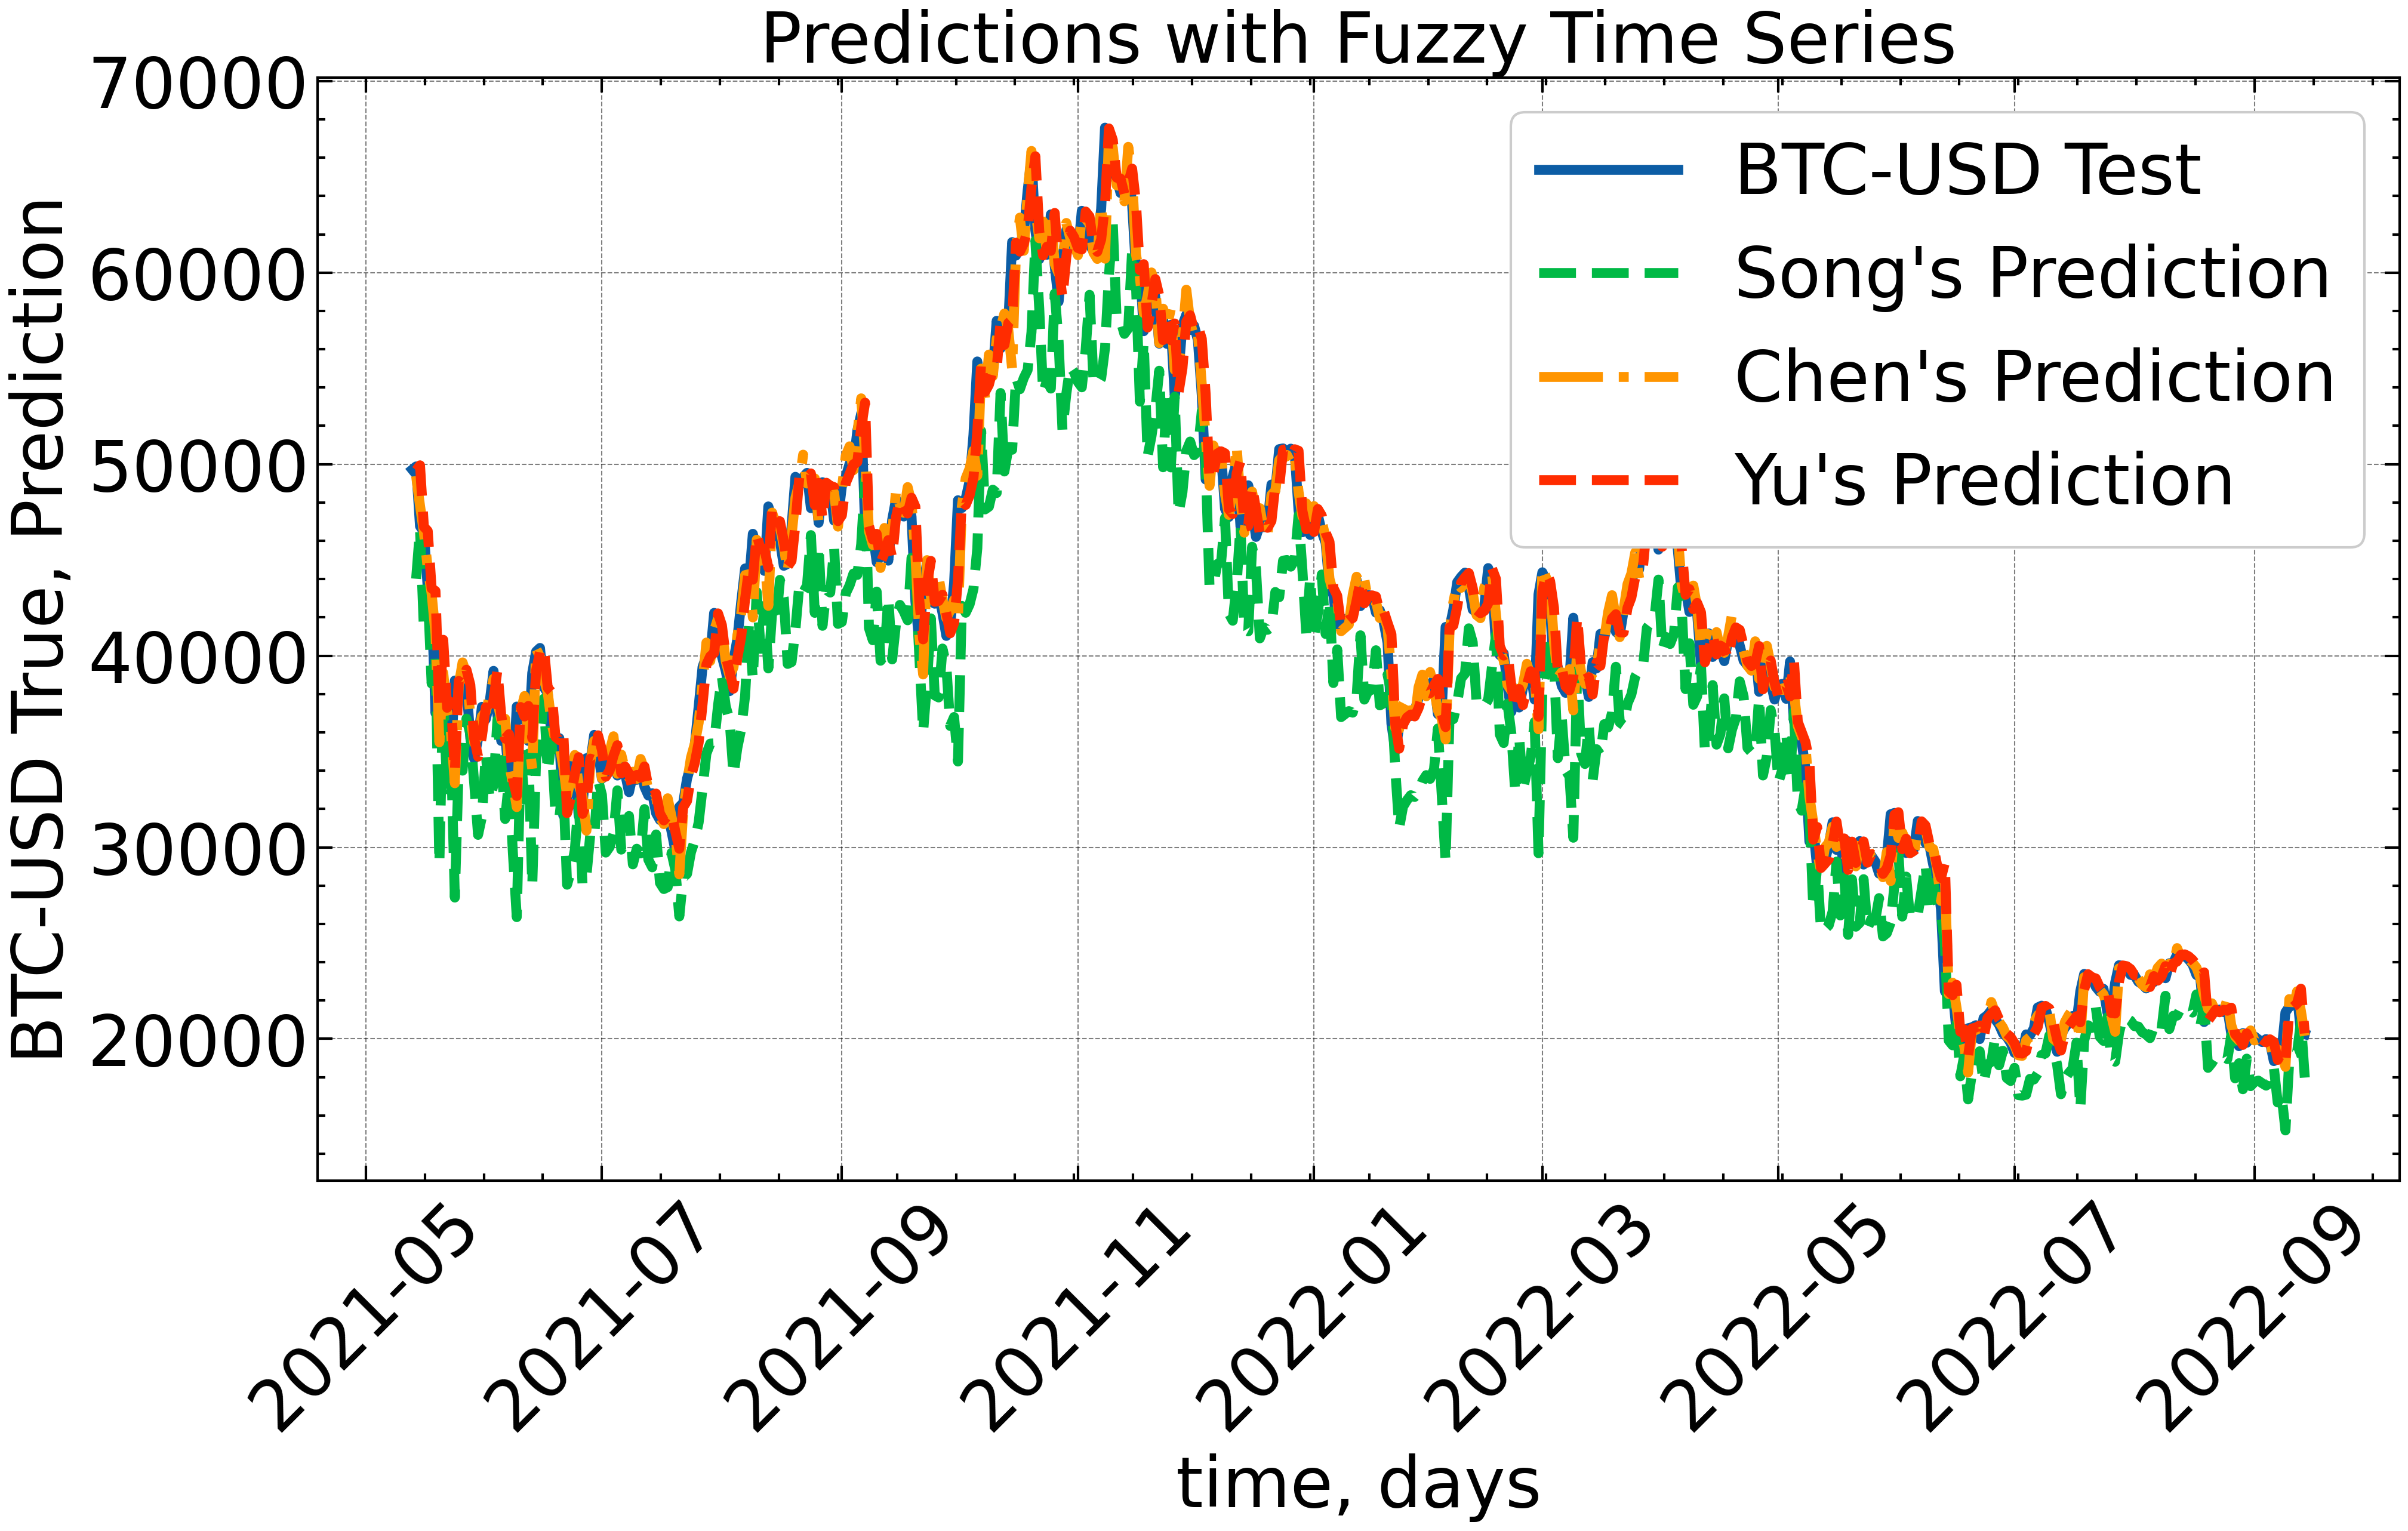

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(data['Adj Close'][split_index:].index, data_test, label=f'{symbol} Test')
ax.plot(data['Adj Close'][split_index:].index, forecast_song, '--', label="Song's Prediction")
ax.plot(data['Adj Close'][split_index:].index, forecast_chen, linestyle='dashdot', label="Chen's Prediction")
ax.plot(data['Adj Close'][split_index:].index, forecast_yu, '--', label="Yu's Prediction")

ax.set_xlabel("time, days")
ax.set_ylabel(f"{symbol} True, Prediction")
ax.set_title(f"Predictions with Fuzzy Time Series")
ax.legend()

plt.xticks(rotation = 45)

plt.savefig(f"{symbol}, Prediction.jpg")
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
def printScore(y_test, predict):
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    errors = abs(predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
def plot_ape_year(test, forecast, title):
    ape = 100*(np.abs(test - forecast)/test)
    df = pd.DataFrame({'Year': data['Adj Close'][split_index+1:].index.year, 'APE': ape})

    fig, ax = plt.subplots(figsize=(15,8))
    sns.boxplot(x=df['Year'], y=df['APE'])
    ax.set_ylabel("APE (%)")
    ax.set_title(title)

    plt.savefig(f"{symbol}, " + title)
    plt.show()

In [ ]:
printScore(data_test[1:], forecast_song[1:])

Mean Absolute Error: 4020.1259
Mean Squared Error: 22456055.888
Root Mean Squared Error: 4738.7821
(R^2) Score: 0.8401
Accuracy: 89.78 %.


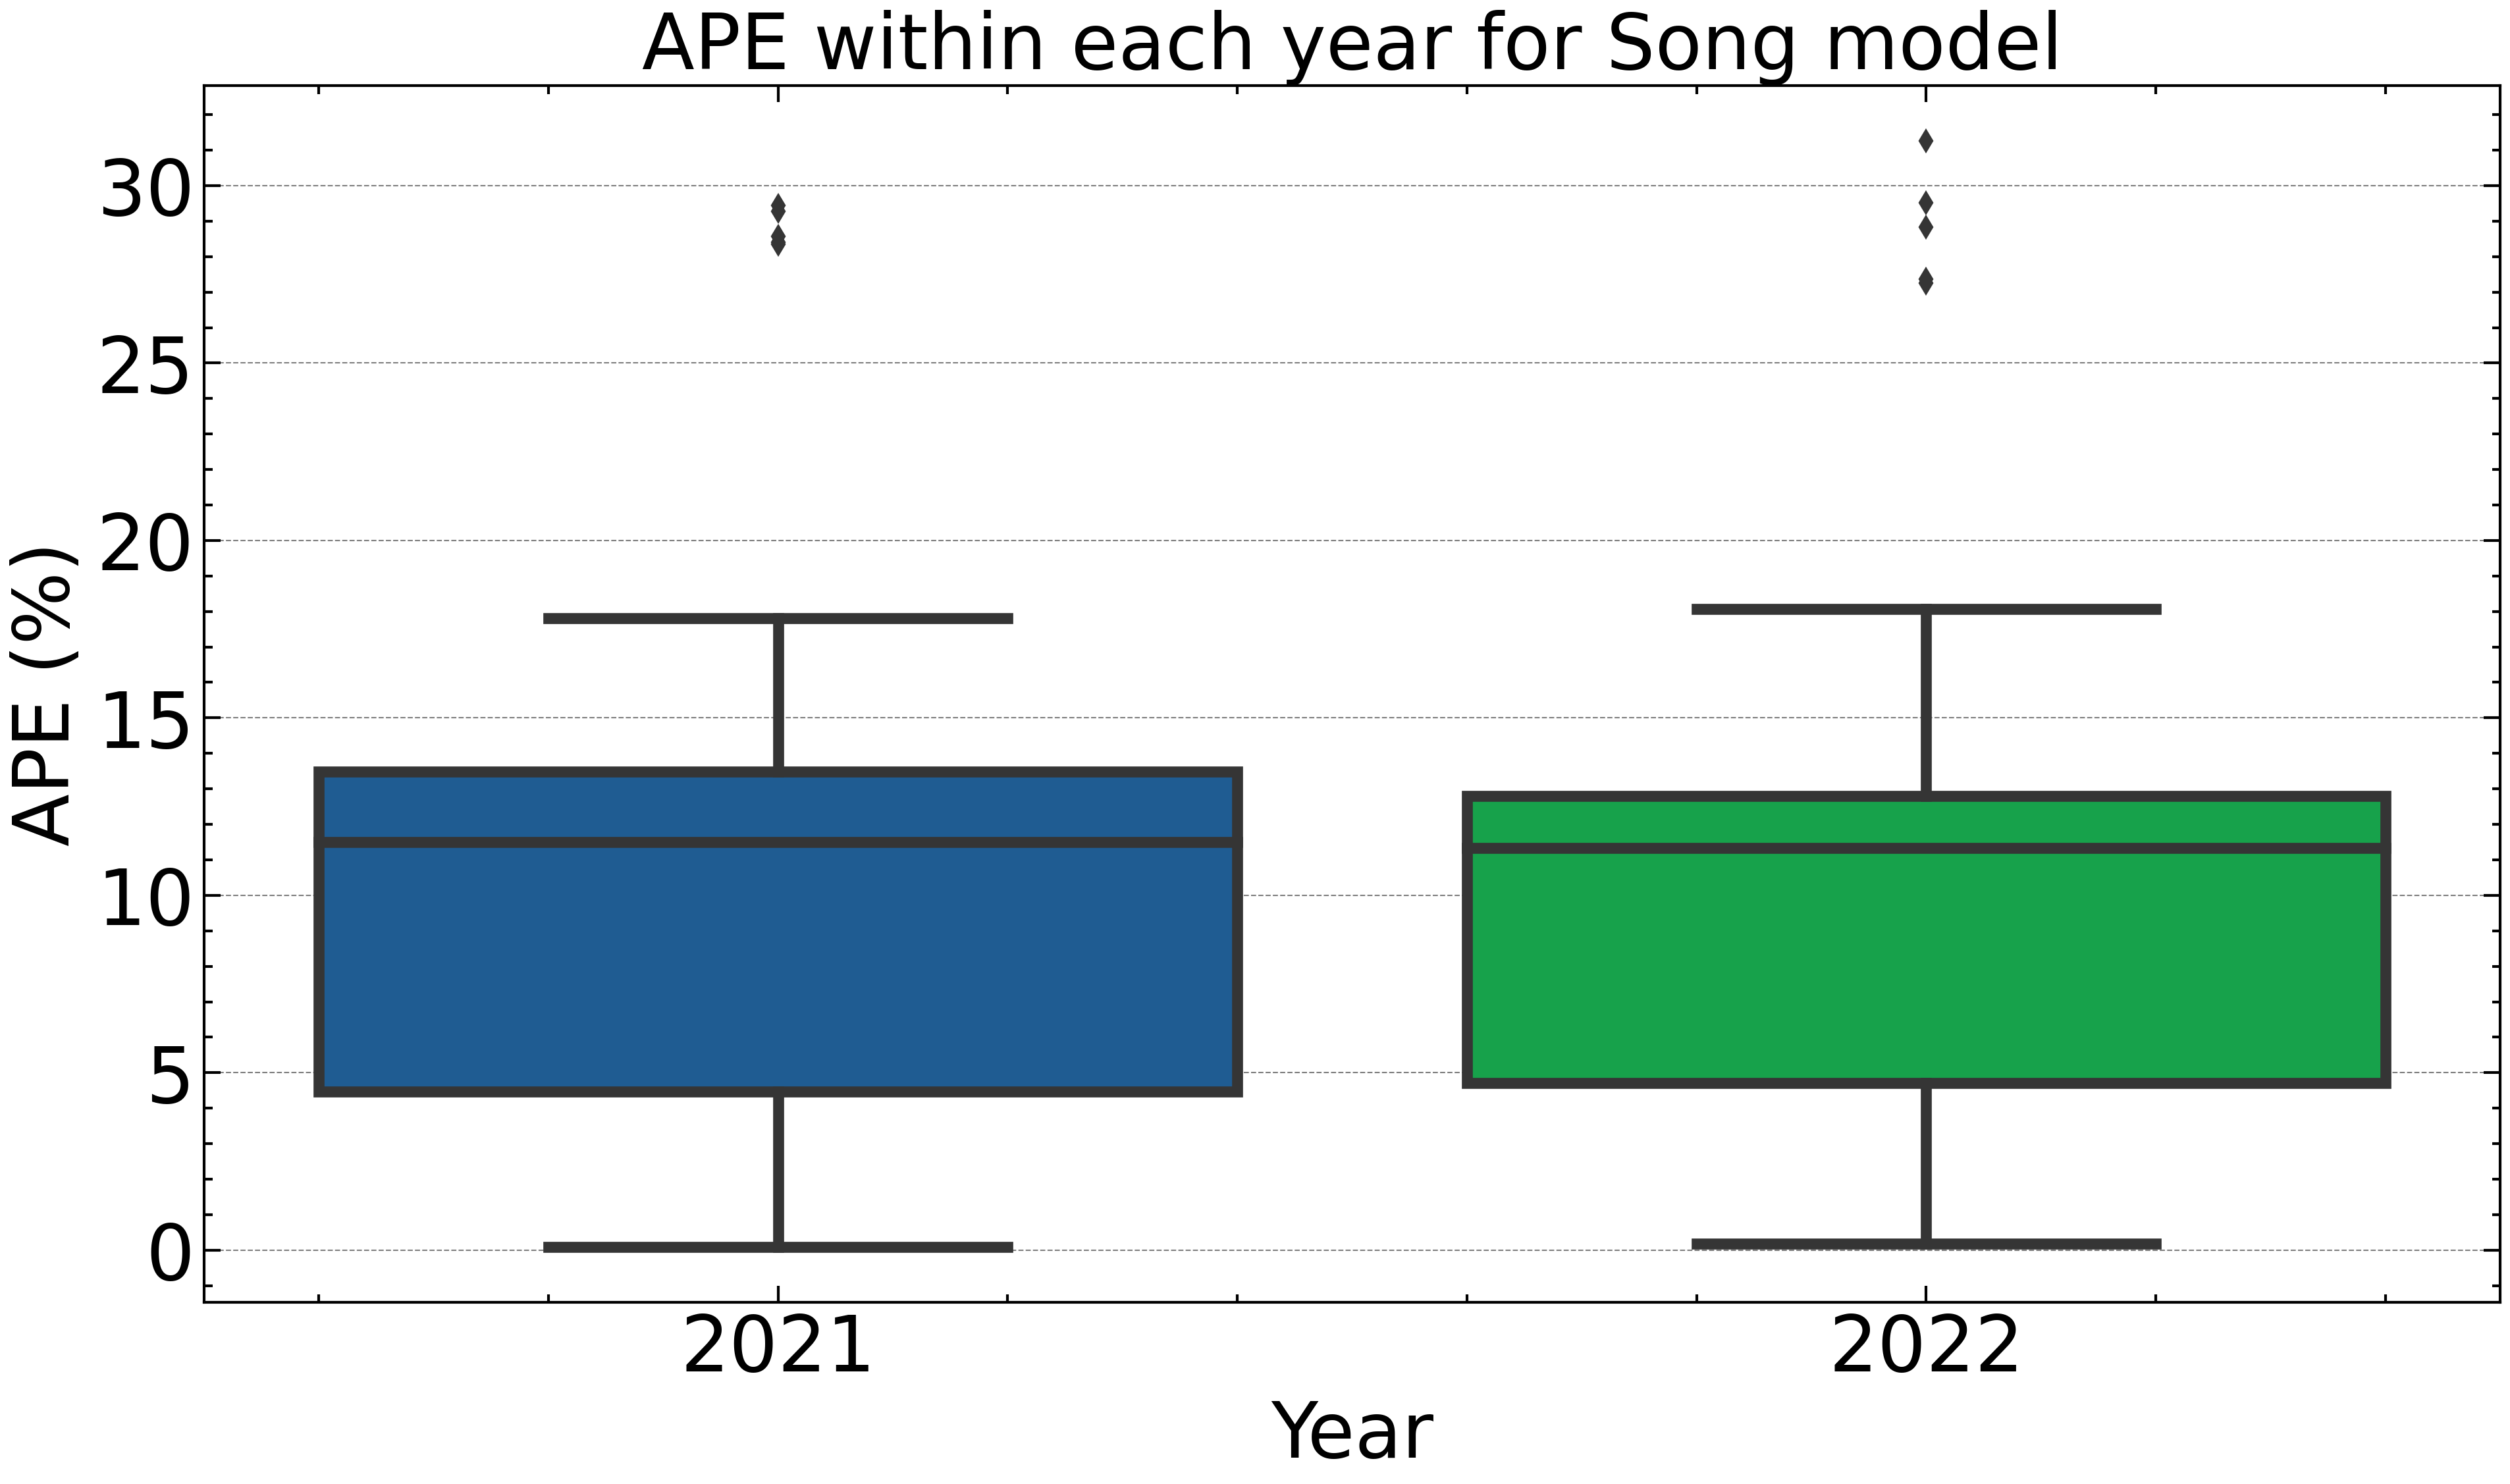

In [ ]:
plot_ape_year(data_test[1:], forecast_song[1:], title="APE within each year for Song model")

In [ ]:
printScore(data_test[1:], forecast_chen[1:])

Mean Absolute Error: 711.8014
Mean Squared Error: 1587111.5407
Root Mean Squared Error: 1259.8062
(R^2) Score: 0.9887
Accuracy: 98.14 %.


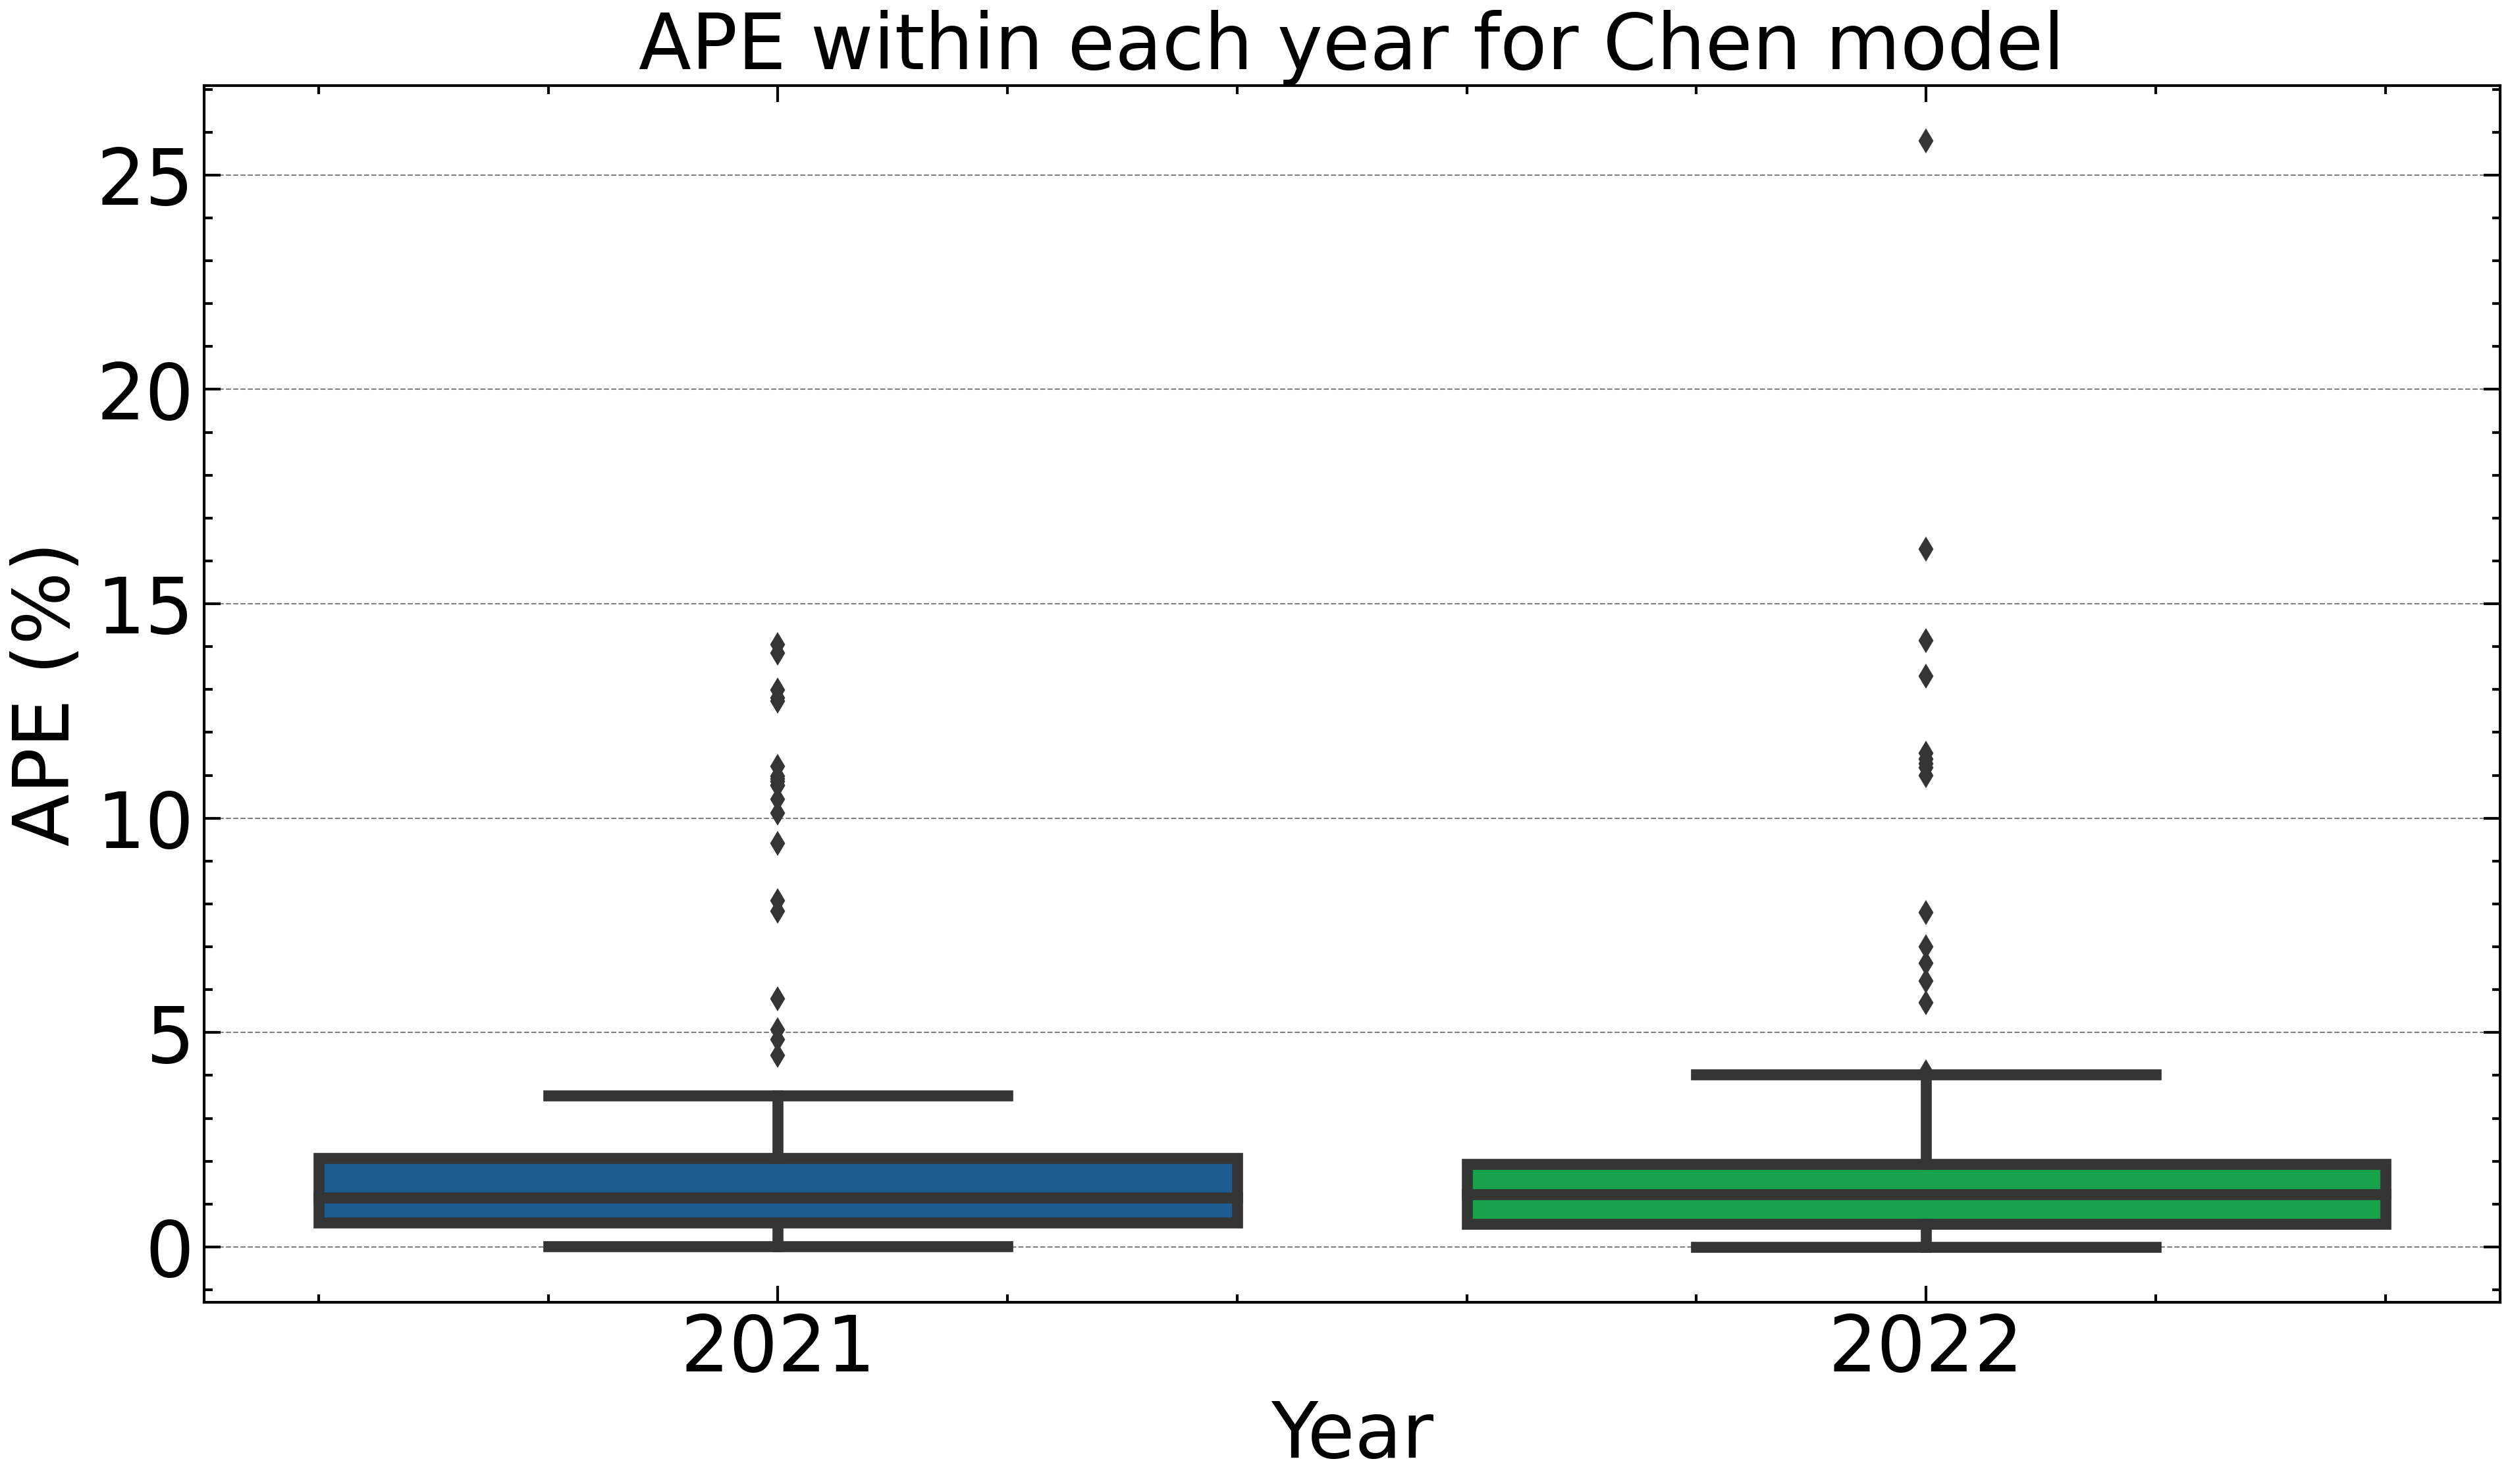

In [ ]:
plot_ape_year(data_test[1:], forecast_chen[1:], title="APE within each year for Chen model")

In [ ]:
printScore(data_test[1:], forecast_yu[1:])

Mean Absolute Error: 1027.9605
Mean Squared Error: 2278738.7131
Root Mean Squared Error: 1509.5492
(R^2) Score: 0.9838
Accuracy: 97.32 %.


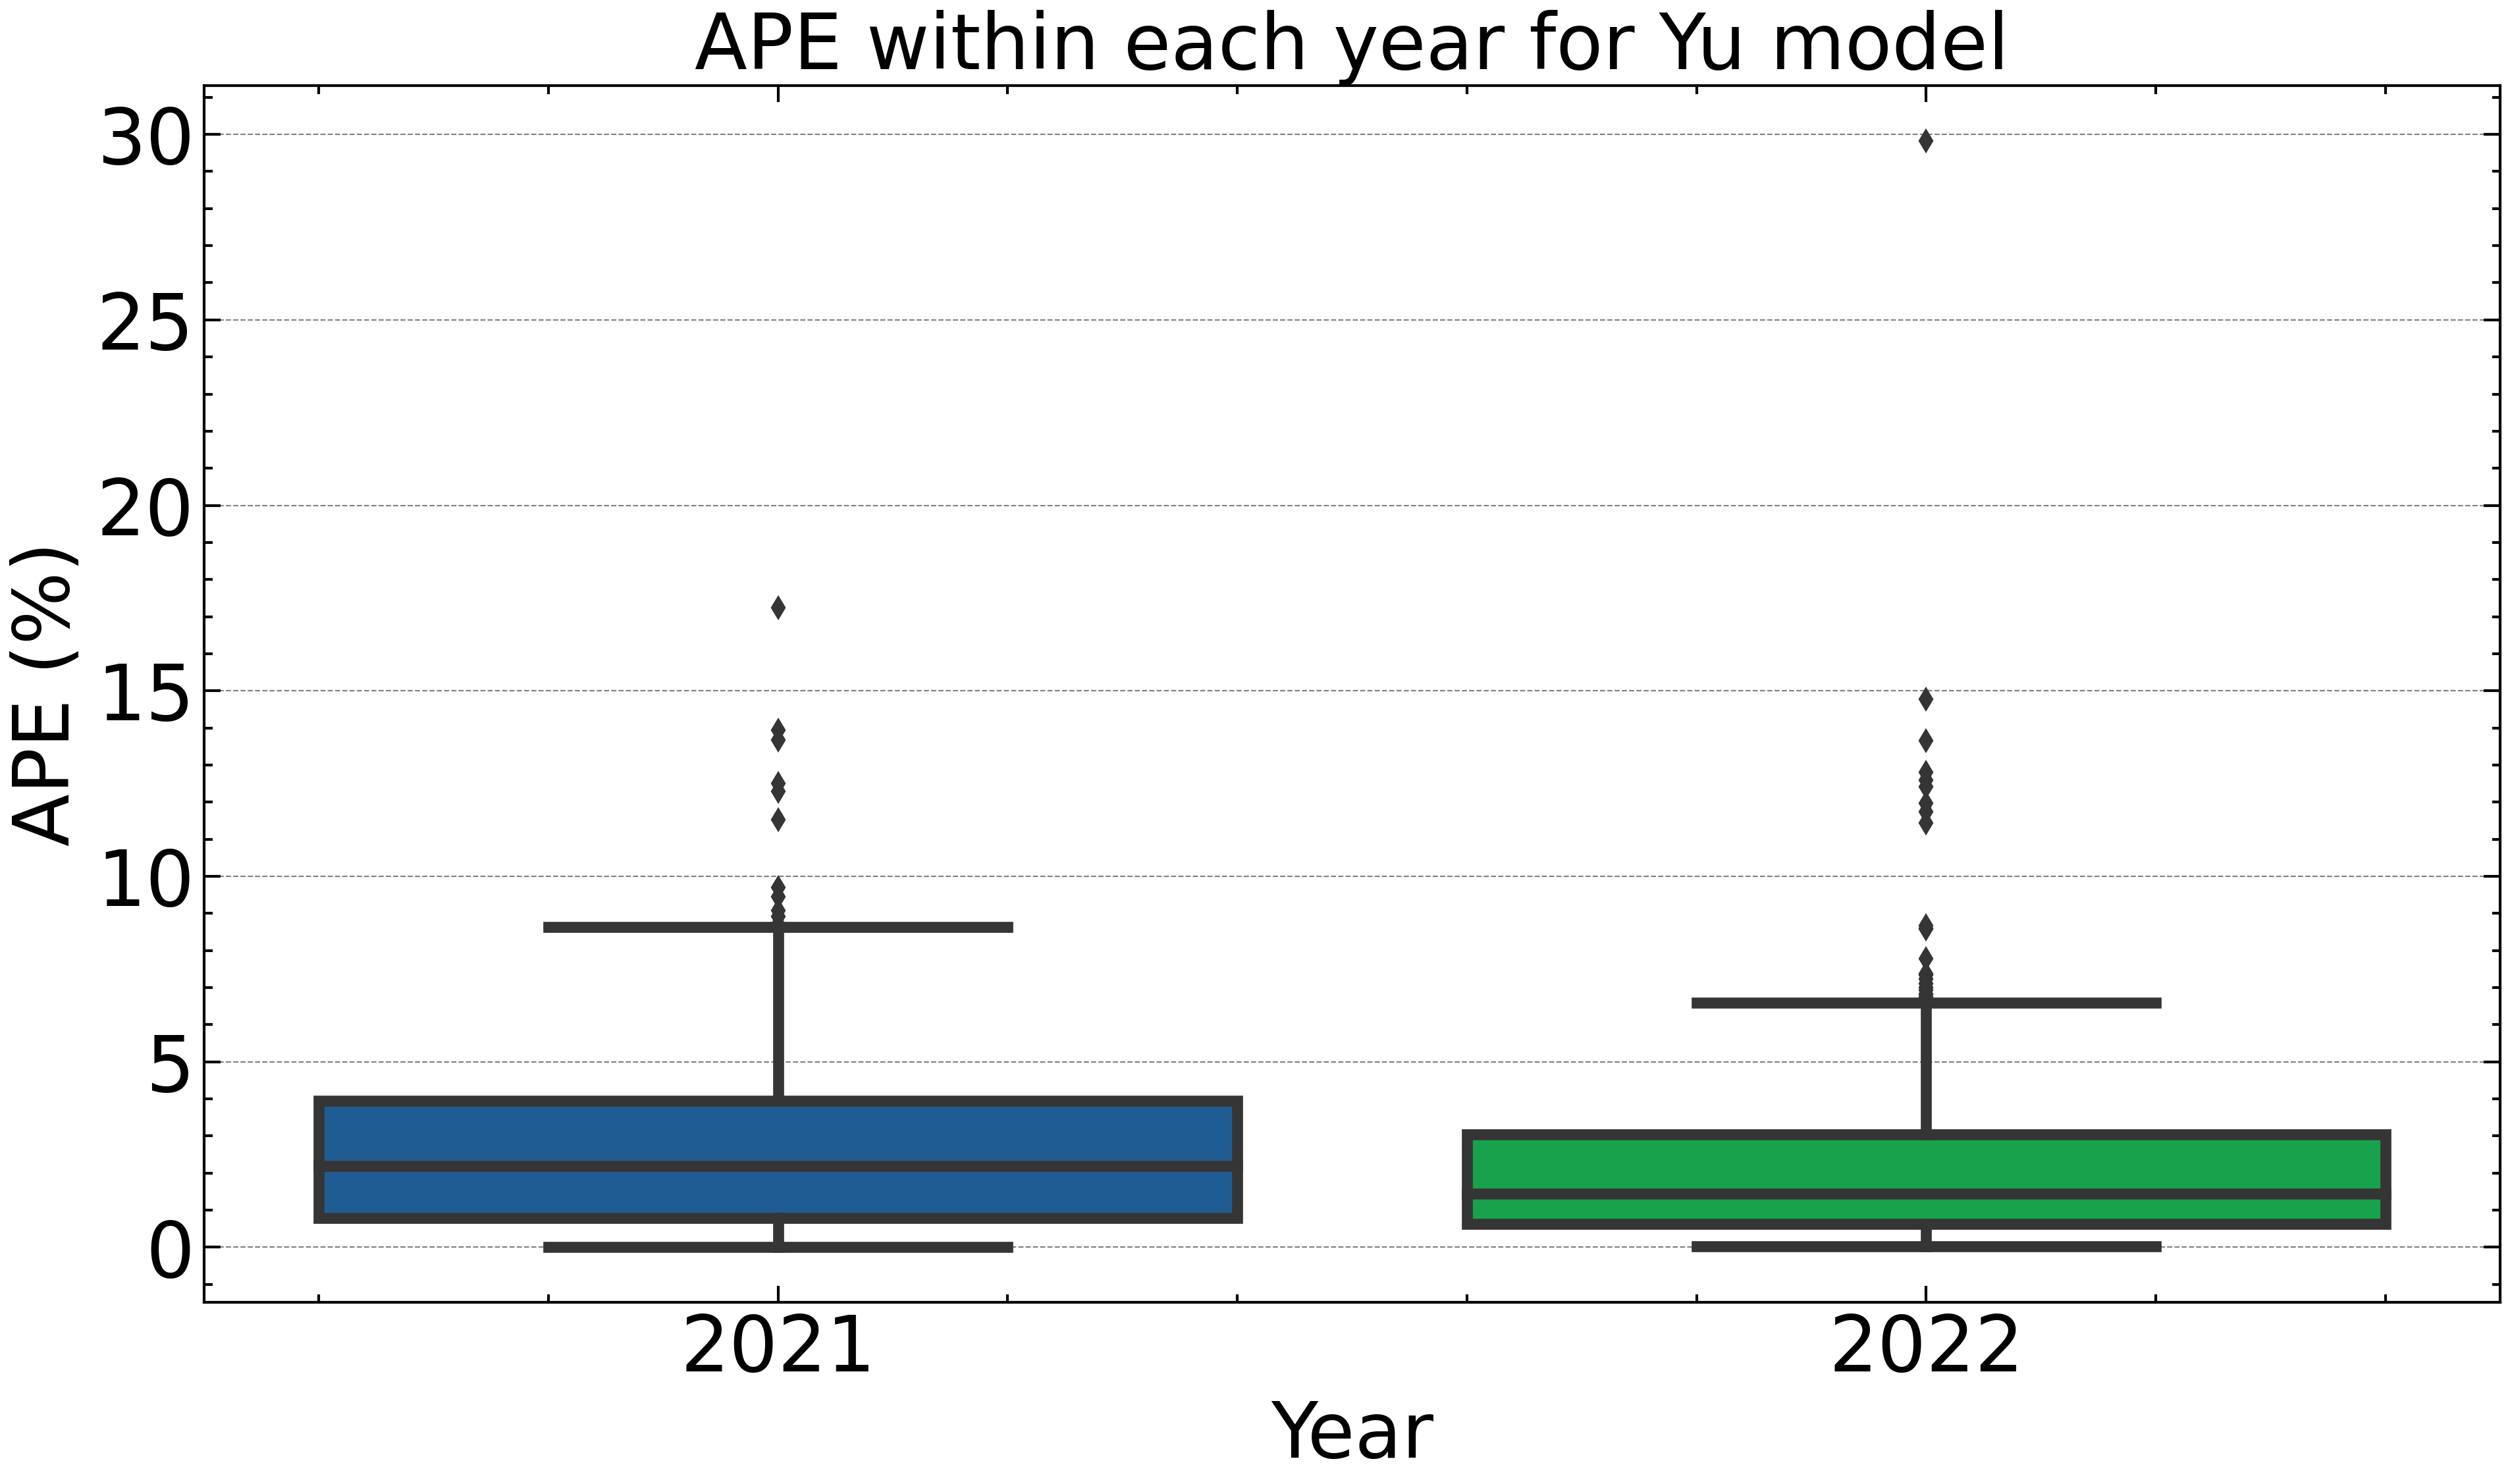

In [ ]:
plot_ape_year(data_test[1:], forecast_yu[1:], title="APE within each year for Yu model")

In [ ]:
def res_diagnostics(data, forecast, lags=None, title='', filename=''):
    y = data - forecast
    y = pd.Series(y)

    # ковзне середнє та стандартне відхилення
    rolling_mean = y.rolling(window=12).mean()
    rolling_std = y.rolling(window=12).std()

    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))

    # виведення рядів
    y.plot(ax=ts_ax, legend=True, label=r'$\epsilon$')
    rolling_mean.plot(ax=ts_ax, color='crimson', legend=True, label=r'$\mu$');
    rolling_std.plot(ax=ts_ax, color='darkslateblue', legend=True, label=r'$\sigma$');
    plt.legend([r'$\mu$', r'$\sigma$'], loc='best')
    ts_ax.set_title(title);
    ts_ax.set_xlabel('(a)')

    # графіки автокореляції
    plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    acf_ax.set_xlabel('(b)')
    plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
    pacf_ax.set_xlabel('(c)')

    # qq діаграма
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    qq_ax.set_xlabel('(d)')

    # гістограма
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    hist_ax.set_xlabel('(e)')
    plt.tight_layout();
    plt.savefig('{}.png'.format(filename))
    plt.show()

     # проводимо тест Дікі-Фуллера
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    print('\nResults of Ljung-Box test')
    lb_test = acorr_ljungbox(y, lags=5, return_df=True)
    print(lb_test)
    return

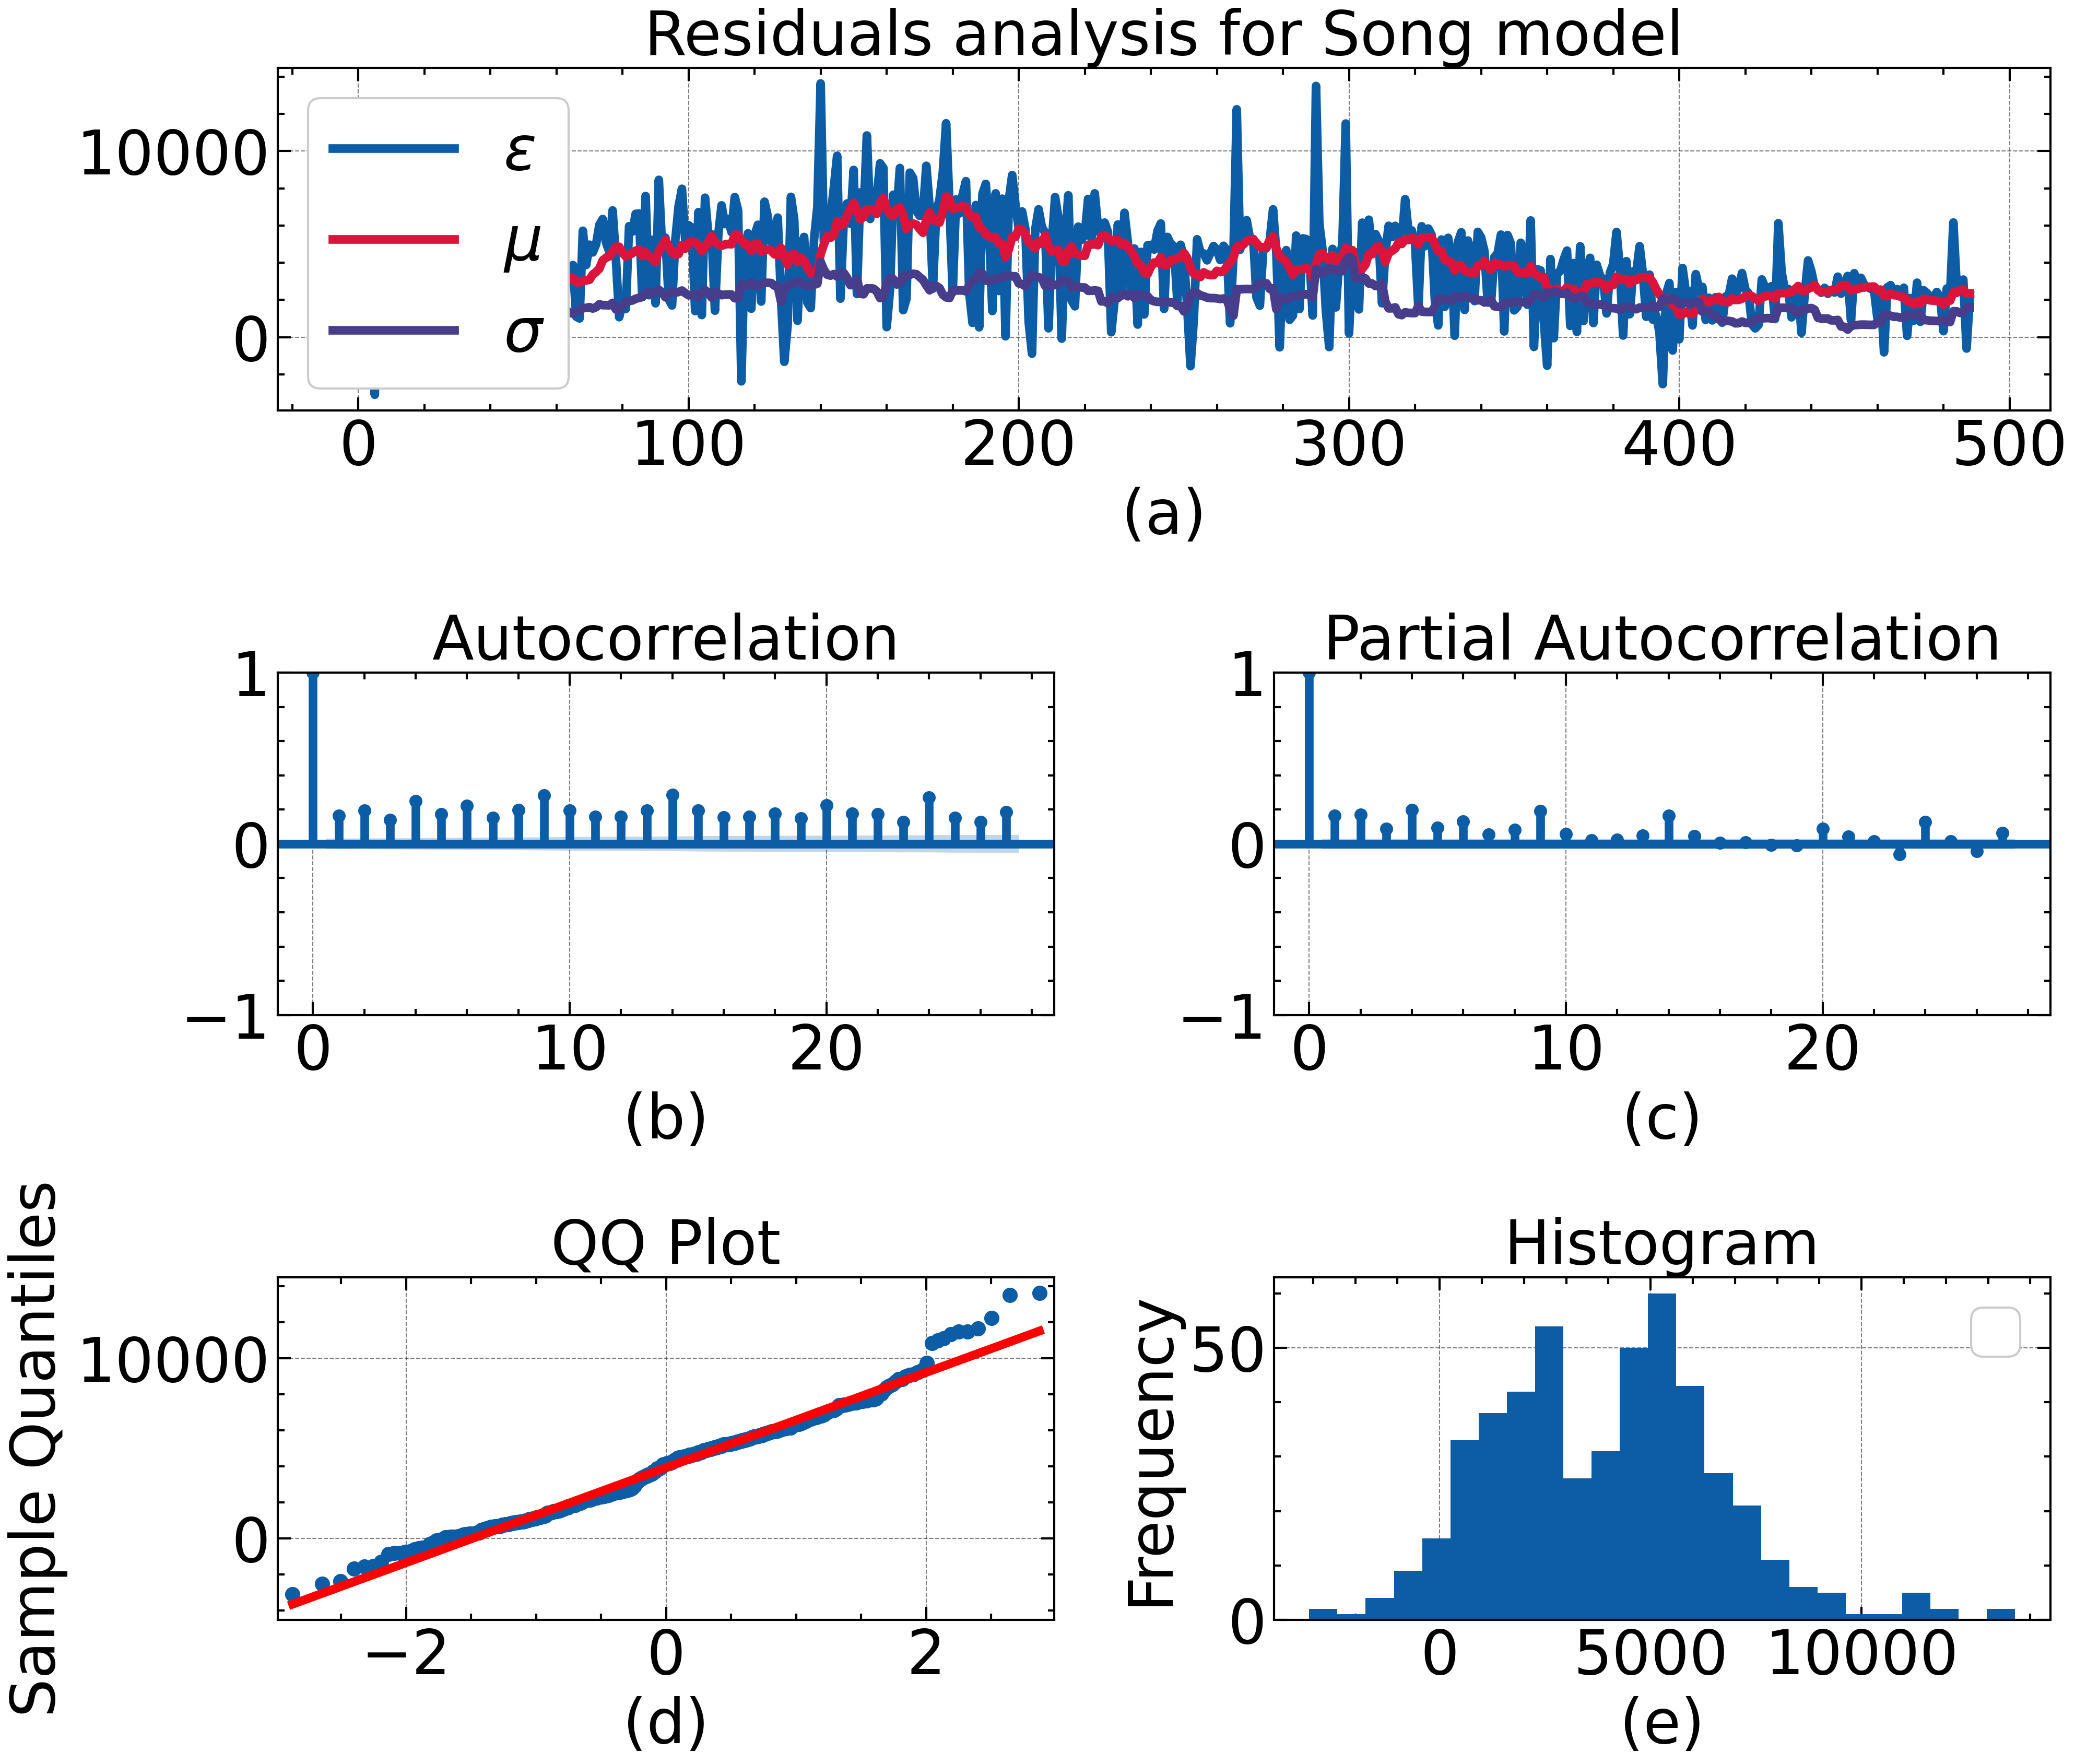

Results of Dickey-Fuller test:
test statistic           -2.149317
p-value                   0.225152
# of lags                13.000000
# of observations       475.000000
Critical Value (1%)      -3.444192
Critical Value (5%)      -2.867644
Critical Value (10%)     -2.570021
dtype: float64

Results of Ljung-Box test
     lb_stat     lb_pvalue
1  13.381214  2.541572e-04
2  32.000404  1.125125e-07
3  41.469266  5.199772e-09
4  71.992552  8.613386e-15
5  87.151181  2.663498e-17


In [ ]:
res_diagnostics(data_test[1:], forecast_song[1:], title='Residuals analysis for Song model', filename=f'{symbol} res analysis for Song')

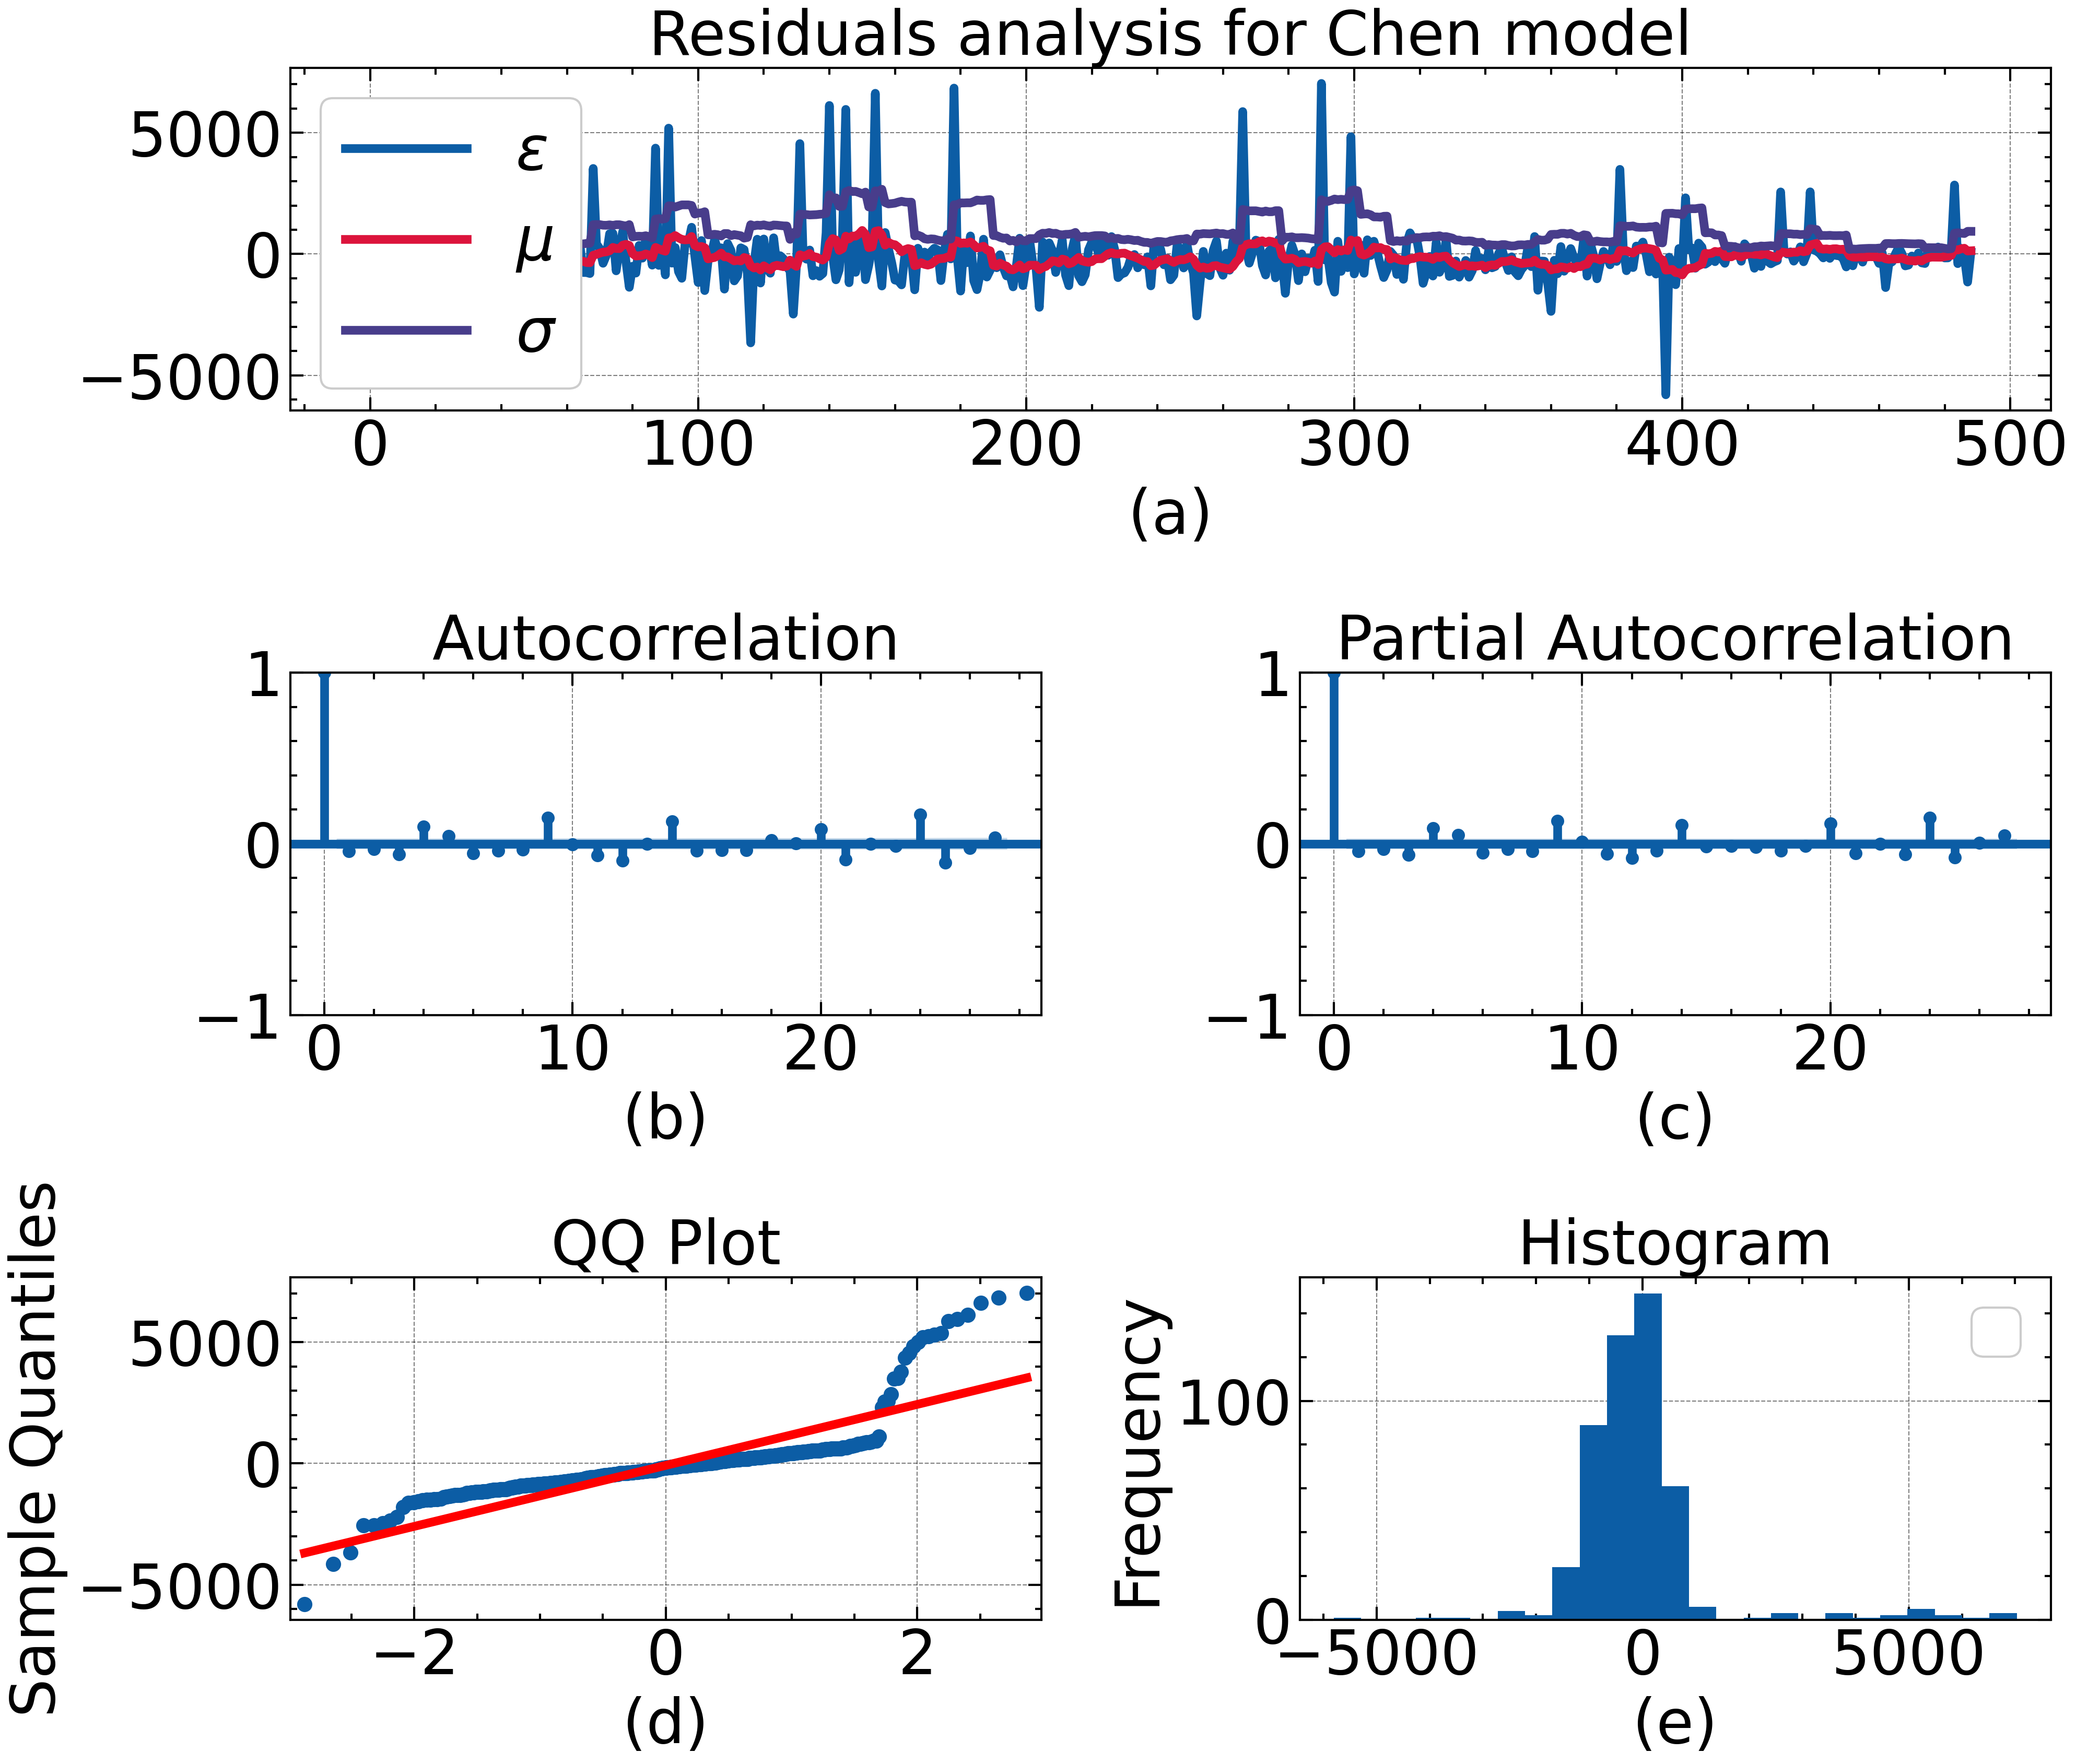

Results of Dickey-Fuller test:
test statistic           -5.605432
p-value                   0.000001
# of lags                13.000000
# of observations       475.000000
Critical Value (1%)      -3.444192
Critical Value (5%)      -2.867644
Critical Value (10%)     -2.570021
dtype: float64

Results of Ljung-Box test
    lb_stat  lb_pvalue
1  0.959894   0.327214
2  1.404474   0.495476
3  3.352039   0.340465
4  8.179984   0.085203
5  9.207622   0.101064


In [ ]:
res_diagnostics(data_test[1:], forecast_chen[1:], title='Residuals analysis for Chen model', filename=f'{symbol} res analysis for Chen')

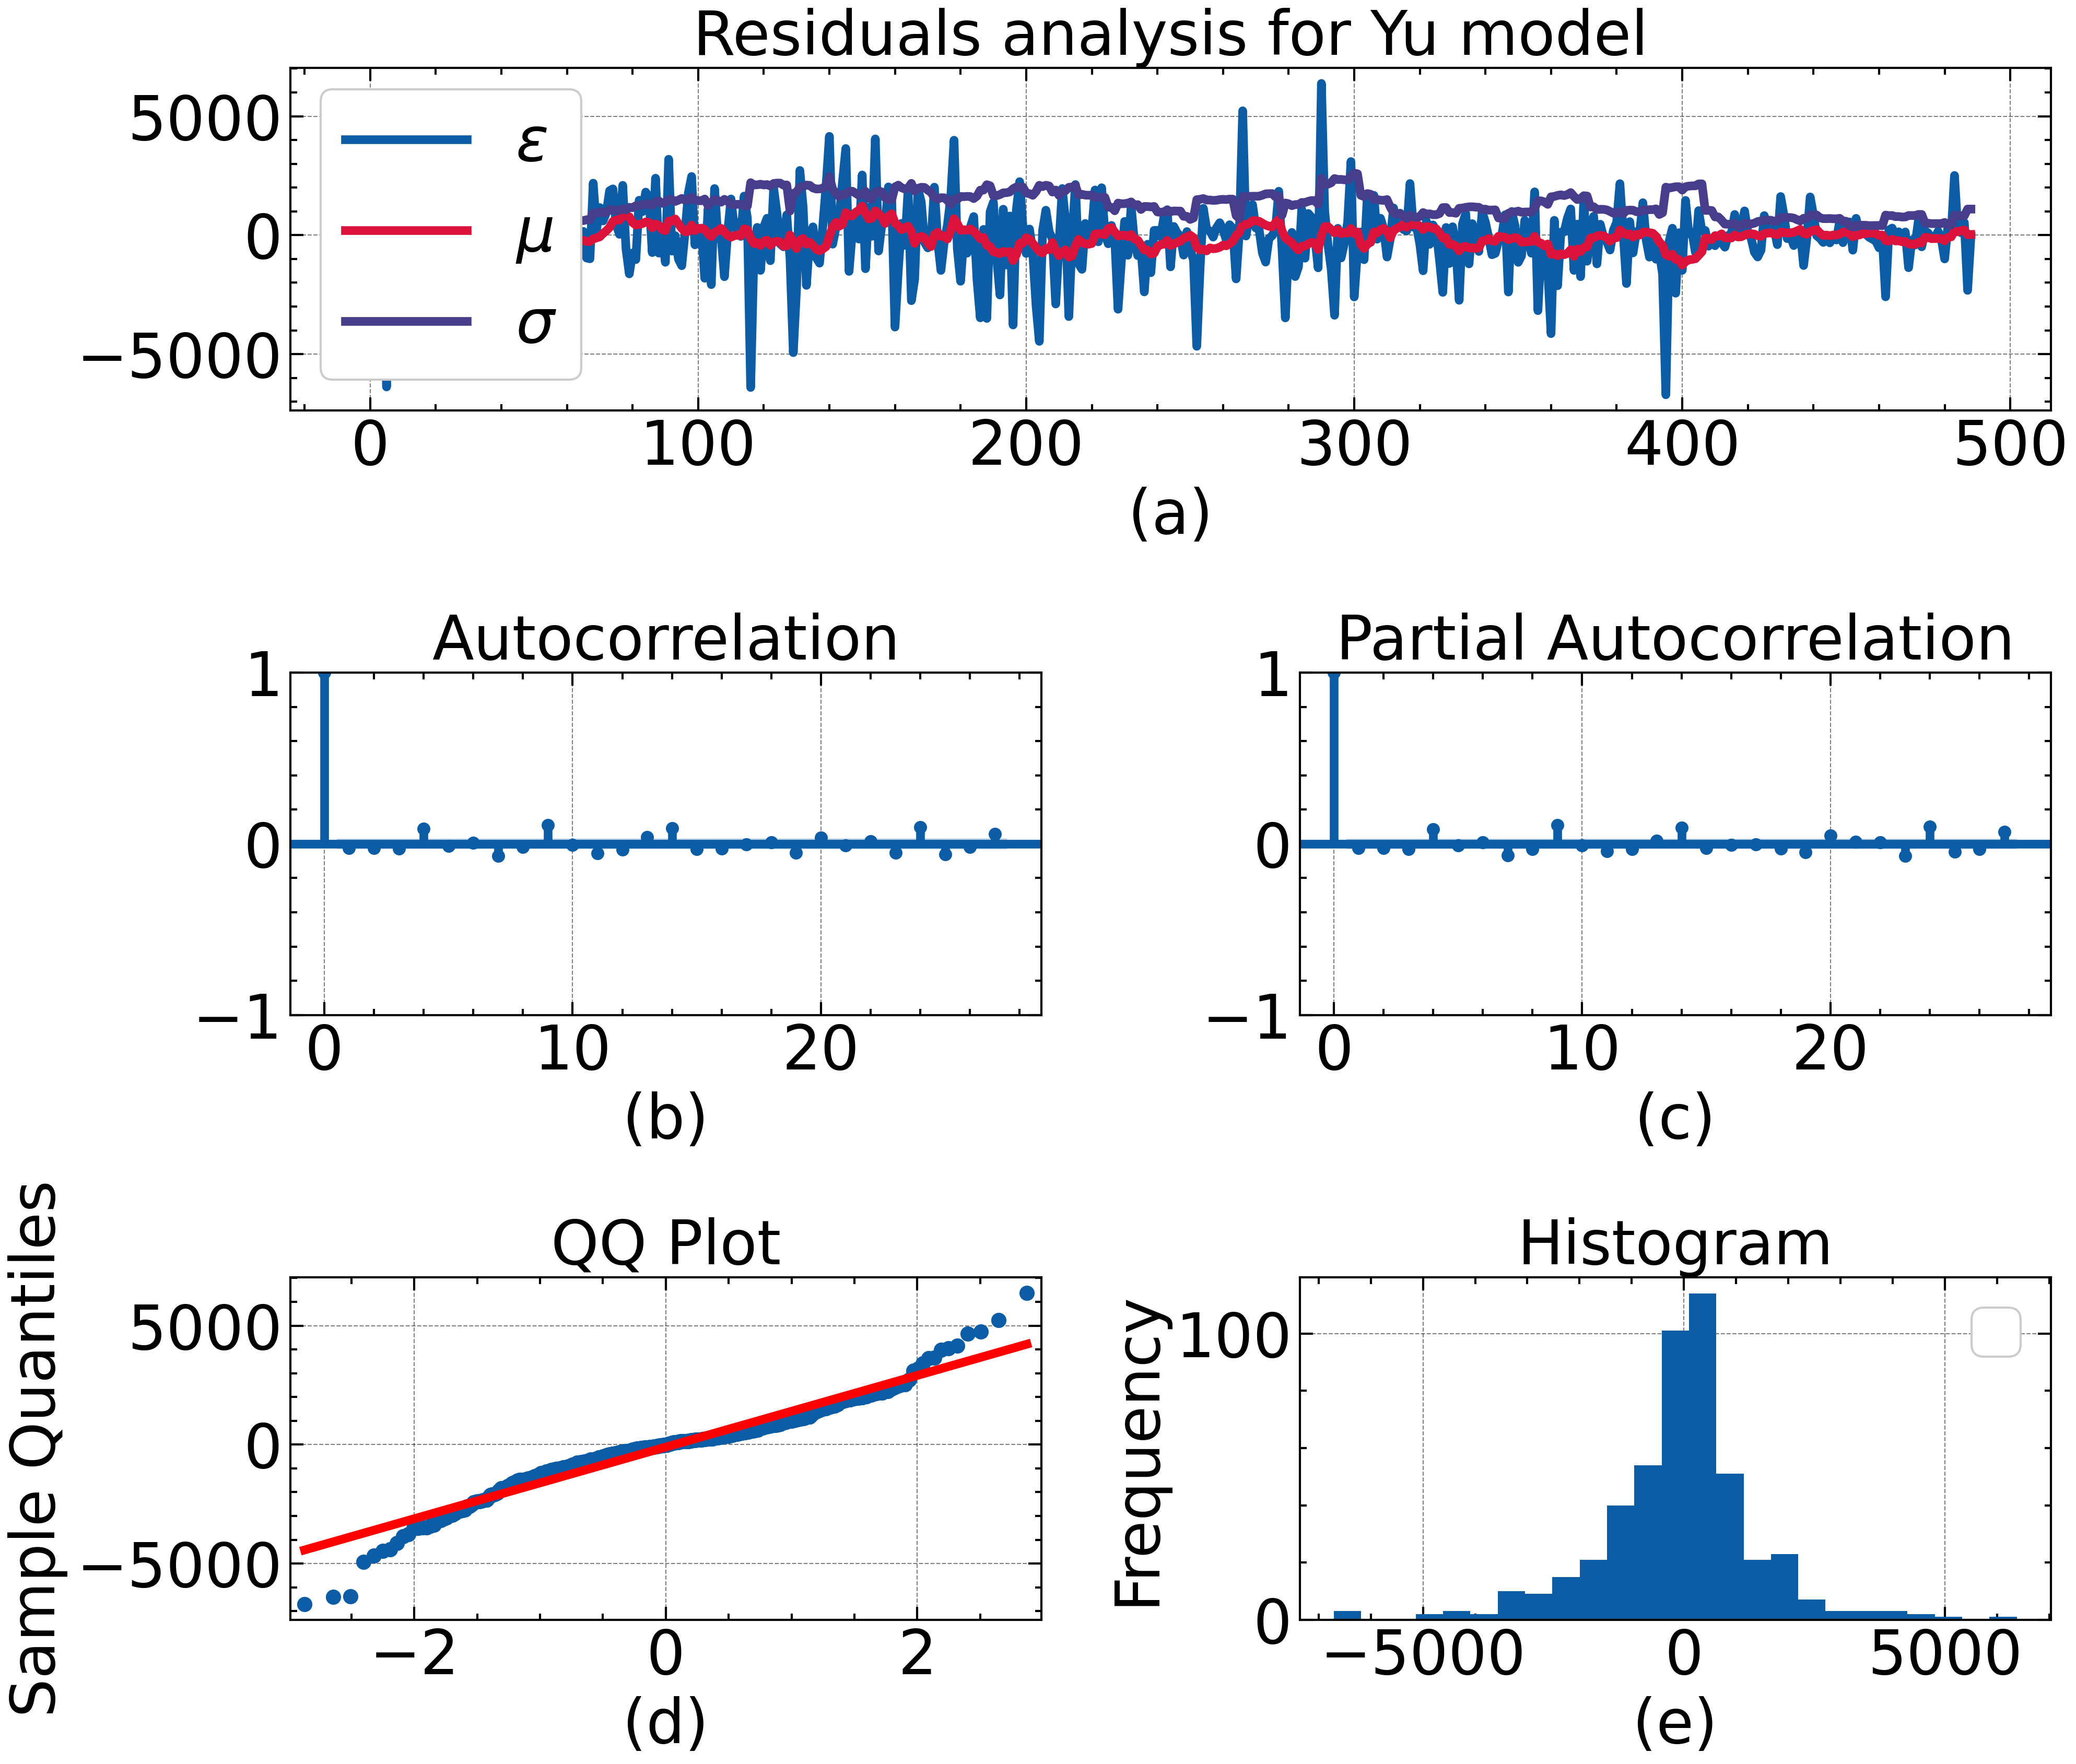

Results of Dickey-Fuller test:
test statistic         -1.616246e+01
p-value                 4.451009e-29
# of lags               1.000000e+00
# of observations       4.870000e+02
Critical Value (1%)    -3.443849e+00
Critical Value (5%)    -2.867493e+00
Critical Value (10%)   -2.569941e+00
dtype: float64

Results of Ljung-Box test
    lb_stat  lb_pvalue
1  0.278556   0.597649
2  0.547569   0.760496
3  0.966178   0.809435
4  4.729156   0.316233
5  4.818586   0.438419


In [ ]:
res_diagnostics(data_test[1:], forecast_yu[1:], title='Residuals analysis for Yu model', filename=f'{symbol} res analysis for Yu')